In [ ]:
!pip install pytickersymbols

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 78 kB 3.1 MB/s 
  Attempting uninstall: wheel
    Found existing installation: wheel 0.38.3
    Uninstalling wheel-0.38.3:
      Successfully uninstalled wheel-0.38.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install urllib3
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fastrank
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 891 kB 4.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install python-terrier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 5.9 MB/s 
     |████████████████████████████████| 1.5 MB 21.0 MB/s 
     |████████████████████████████████| 69 kB 6.6 MB/s 
     |████████████████████████████████| 311 kB 35.8 MB/s 
     |████████████████████████████████| 46 kB 2.8 MB/s 
     |████████████████████████████████| 286 kB 47.6 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████████████| 72 kB 1.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2 MB 43.8 MB/s 
     |████████████████████████████████| 293 kB 62.4 MB/s 
     |████████████████████████████████| 133 kB 53.7 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.9.1-py3-none-any.whl size=110765 sha256=12e2564a6890cd9ae4b1dec03fa81a253db5302420a3

In [ ]:
import pandas as pd
import urllib3
import urllib3.request as ur
import requests
import re
import json
#import yfinance as yf
import pyterrier as pt
import os
import numpy as np
from bs4 import BeautifulSoup


In [ ]:
http = urllib3.PoolManager()
nan=np.nan

## Get tickers

In [ ]:
from pytickersymbols import PyTickerSymbols

stock_data = PyTickerSymbols()
all_ticker_getter_names = list(filter(
   lambda x: (
         x.endswith('_yahoo_tickers')
   ),
   dir(stock_data),
))
print(all_ticker_getter_names)
with open('tickers','w') as f:
  for a in all_ticker_getter_names:
    f.write(a+'\n')


['get_aex_frankfurt_yahoo_tickers', 'get_aex_london_yahoo_tickers', 'get_aex_moscow_yahoo_tickers', 'get_aex_nyc_yahoo_tickers', 'get_bel_20_frankfurt_yahoo_tickers', 'get_bel_20_london_yahoo_tickers', 'get_bel_20_moscow_yahoo_tickers', 'get_bel_20_nyc_yahoo_tickers', 'get_cac_40_frankfurt_yahoo_tickers', 'get_cac_40_london_yahoo_tickers', 'get_cac_40_moscow_yahoo_tickers', 'get_cac_40_nyc_yahoo_tickers', 'get_cac_mid_60_frankfurt_yahoo_tickers', 'get_cac_mid_60_london_yahoo_tickers', 'get_cac_mid_60_moscow_yahoo_tickers', 'get_cac_mid_60_nyc_yahoo_tickers', 'get_cdax_frankfurt_yahoo_tickers', 'get_cdax_london_yahoo_tickers', 'get_cdax_moscow_yahoo_tickers', 'get_cdax_nyc_yahoo_tickers', 'get_dax_frankfurt_yahoo_tickers', 'get_dax_london_yahoo_tickers', 'get_dax_moscow_yahoo_tickers', 'get_dax_nyc_yahoo_tickers', 'get_dow_jones_frankfurt_yahoo_tickers', 'get_dow_jones_london_yahoo_tickers', 'get_dow_jones_moscow_yahoo_tickers', 'get_dow_jones_nyc_yahoo_tickers', 'get_euro_stoxx_50_fran

In [ ]:
# dax_yahoo = stock_data.get_dax_frankfurt_yahoo_tickers()
# print(len(dax_yahoo))
# dax_yahoo.extend(stock_data.get_aex_london_yahoo_tickers())
# print(len(dax_yahoo))
# dax_yahoo.extend(stock_data.get_aex_nyc_yahoo_tickers())
ticker=[]
#print(len(dax_yahoo))
for a in all_ticker_getter_names:
  res=getattr(stock_data, a)
  ticker.extend(res())
print(len(ticker))

5952


In [ ]:
ticker_df=pd.read_csv("/content/drive/MyDrive/SI650/FinalProject/nasdaq_ticker.csv")
print(len(ticker_df.Symbol))
ticker_df

8391


,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$127.44,-4.7400,-3.586%,3.772741e+10,United States,1999.0,1154691,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$39.01,-0.8400,-2.108%,7.018881e+09,NaN,2016.0,6270438,Industrials,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.95,0.0200,0.201%,1.243750e+09,NaN,2021.0,49374,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,$1.89,-0.0700,-3.571%,5.972133e+07,China,2008.0,11290,Consumer Discretionary,Service to the Health Industry
4,AACI,Armada Acquisition Corp. I Common Stock,$9.925,-0.0050,-0.05%,2.055418e+08,United States,2021.0,4059,Industrials,Consumer Electronics/Appliances
...,...,...,...,...,...,...,...,...,...,...,...
8386,ZWS,Zurn Elkay Water Solutions Corporation Common ...,$24.58,-0.6300,-2.499%,4.369021e+09,United States,2012.0,574758,Utilities,Environmental Services
8387,ZY,Zymergen Inc. Common Stock,$2.78,-0.1200,-4.138%,2.901078e+08,United States,2021.0,755183,Industrials,Industrial Specialties
8388,ZYME,Zymeworks Inc. Common Shares,$5.90,-0.2900,-4.685%,3.639969e+08,Canada,2017.0,1057437,Health Care,Pharmaceuticals and Biotechnology
8389,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$0.7411,-0.0835,-10.126%,3.390761e+07,United States,2015.0,242308,Health Care,Biotechnology: Pharmaceutical Preparations


In [ ]:
ticker.extend(ticker_df.Symbol.values)
t=list(set(ticker))
print(len(t))

11100


## import tickers

In [ ]:
t=pd.read_csv("/content/drive/MyDrive/SI650/FinalProject/documents_profile_clean.csv",index_col=False)
print(len(t))
# t.rename({'index':"ticker"})
# t=t['index'][:2000]
# t[1:10]

10485


# Financial

## webpage scrape

In [ ]:
finance_url= "https://finance.yahoo.com/quote/" + index + "?p=" + index
  r = http.request('GET', finance_url)
  soup= BeautifulSoup(r.data,'lxml')
  pattern=re.compile(r'\s--\sData\s--\s')
  script_data=soup.find('script',text=pattern).contents[0]
  start=script_data.find('context')-2
  json_data=json.loads(script_data[start:-12])
  temp=json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["defaultKeyStatistics"]
  print(temp["forwardEps"]["raw"]/temp["trailingEps"]["raw"])
  print(json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["summaryDetail"]["dividendYield"])
  try:
      eps.append(temp["forwardEps"]["raw"]/temp["trailingEps"]["raw"])
    except:
      eps.append(nan)
    try:
      dividend.append(temp["summaryDetail"]["dividendYield"]["raw"])
    except:
      dividend.append(nan)

In [ ]:
indexes=t#["KMB","SPNS","GBCI","SBT"]
finance_eps_divi=[]
eps=[]
dividend=[]
for index in indexes:
  finance_url= "https://finance.yahoo.com/quote/" + index + "?p=" + index
  try:
    r = http.request('GET', finance_url)
    soup= BeautifulSoup(r.data,'lxml')
    pattern=re.compile(r'\s--\sData\s--\s')
    script_data=soup.find('script',text=pattern).contents[0]
    start=script_data.find('context')-2
    json_data=json.loads(script_data[start:-12])
    temp=json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["defaultKeyStatistics"]
    # print(temp["forwardEps"]["raw"]/temp["trailingEps"]["raw"])
    # print(json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["summaryDetail"]["dividendYield"]) 
    try:
      eps.append(temp["forwardEps"]["raw"]/temp["trailingEps"]["raw"])
    except:
      idx = yf.Ticker(index)
      try:
        eps.append(idx.balance_sheet.loc["forwardEps"]/idx.balance_sheet.loc["trailingEps"]) #need to be <1
      except:
        eps.append(nan)
    try:
      dividend.append(json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["summaryDetail"]["dividendYield"]["raw"])
    except:
      idx = yf.Ticker(index)
      try:
        dividend.append(idx.balance_sheet.loc["dividendYield"])
      except:
        dividend.append(nan)
  except:
    eps.append(nan)
    dividend.append(nan)
finance_eps_divi.append(eps)
finance_eps_divi.append(dividend)
finance_eps_divi

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

[[-3.2085561497326203,
  1.2034220532319393,
  1.3333333333333335,
  1.2921810699588476,
  0.9166666666666667,
  7.2742616033755265,
  -2.7407407407407405,
  nan,
  nan,
  nan,
  1.6515151515151516,
  nan,
  nan,
  1.1994535519125682,
  1.226027397260274,
  nan,
  1.564885496183206,
  130.0,
  0.9067357512953368,
  0.719626168224299,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0.16835016835016833,
  nan,
  0.46691403834260975,
  nan,
  nan,
  1.1191335740072201,
  -0.19019944525161803,
  0.7905634333040531,
  nan,
  -0.4149971379507727,
  -0.43029259896729777,
  21.0,
  nan,
  0.19880715705765406,
  nan,
  nan,
  1.2822647793505413,
  nan,
  nan,
  1.17310443490701,
  nan,
  1.4484514212982604,
  0.5938697318007663,
  0.9632513419453783,
  nan,
  nan,
  nan,
  -8.88888888888889,
  0.0425531914893617,
  0.5519244734931009,
  nan,
  2.826086956521739,
  nan,
  nan,
  1.1192660550458715,
  nan,
  -0.6638115631691648,
  nan,
  0.24805102763997164,
  1.5873684210526315,
  35.90909090

In [ ]:
finance_eps_divi_df=pd.DataFrame(finance_eps_divi).transpose()
finance_eps_divi_df.columns = ['eps', 'dividend']
# np.polyfit([1,2,3,4], finance_df.tcl[0],1)
finance_eps_divi_df

,eps,dividend
0,-3.208556,NaN
1,1.203422,0.0346
2,1.333333,0.0364
3,1.292181,0.0230
4,0.916667,NaN
...,...,...
1995,1.310680,0.0297
1996,15.625000,0.0986
1997,NaN,0.0472
1998,1.177536,0.0142


In [ ]:
finance_eps_divi_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/finance_eps_divi_df.csv")

## full

In [ ]:
index="MSFT"
eps=[]
dividend=[]
tcl=[]
tse=[]
stable=[]
total_cash=[]
total_current_asset=[]
finance_url= "https://finance.yahoo.com/quote/" + index + "?p=" + index
balance_url= "https://finance.yahoo.com/quote/" +index+"/balance-sheet?p=" +index
r = http.request('GET', finance_url)
b = http.request('GET', balance_url)
soup= BeautifulSoup(r.data,'lxml')
pattern=re.compile(r'\s--\sData\s--\s')
script_data=soup.find('script',text=pattern).contents[0]
start=script_data.find('context')-2
json_data=json.loads(script_data[start:-12])
temp=json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["defaultKeyStatistics"]
try:
  eps.append(temp["forwardEps"]["raw"]/temp["trailingEps"]["raw"])
except:
  eps.append(nan)
try:
  dividend.append(temp["summaryDetail"]["dividendYield"]["raw"])
except:
  dividend.append(nan)
soup= BeautifulSoup(b.data,'lxml')
pattern=re.compile(r'\s--\sData\s--\s')
script_data=soup.find('script',text=pattern).contents[0]
start=script_data.find('context')-2
json_data=json.loads(script_data[start:-12])
quoteSummaryStore=json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]
totalCurrentLiabilities=[]#totalCurrentLiabilities
totalStockholderEquity=[]#totalStockholderEquity
stability=[]
for i in range(len(quoteSummaryStore["balanceSheetHistoryQuarterly"]["balanceSheetStatements"])):
  try:
    totalCurrentLiabilities.append(quoteSummaryStore["balanceSheetHistoryQuarterly"]["balanceSheetStatements"][i]["totalCurrentLiabilities"]["raw"])
  except:
    totalCurrentLiabilities.append(nan)
  try:
    totalStockholderEquity.append(quoteSummaryStore["balanceSheetHistoryQuarterly"]["balanceSheetStatements"][i]["totalStockholderEquity"]["raw"])
  except:
    totalStockholderEquity.append(nan)
  try:
    stability.append(quoteSummaryStore["balanceSheetHistoryQuarterly"]["balanceSheetStatements"][i]["totalCurrentLiabilities"]["raw"]/quoteSummaryStore["balanceSheetHistoryQuarterly"]["balanceSheetStatements"][i]["totalStockholderEquity"]["raw"])
  except:
    stability.append(nan)
cash=[]
asset=[]
timeSeries=json_data["context"]["dispatcher"]["stores"]["QuoteTimeSeriesStore"]["timeSeries"]
for i in range(len(timeSeries["annualCashAndCashEquivalents"])):
  try:
    cash.append(timeSeries["annualCashAndCashEquivalents"][i]["reportedValue"]["raw"])#Cash
  except:
    cash.append(nan)
for i in range(len(timeSeries["annualCurrentAssets"])):
  # try:
  print(timeSeries["annualCurrentAssets"][i]["reportedValue"]["raw"])
  asset.append(timeSeries["annualCurrentAssets"][i]["reportedValue"]["raw"])#CurrentAssets
  # except:
  #   asset.append(nan)
if len(totalCurrentLiabilities)>0:#totalCurrentLiabilities
  tcl.append(totalCurrentLiabilities)
else:
  tcl.append(nan)
if len(totalStockholderEquity)>0:#totalStockholderEquity
  tse.append(totalStockholderEquity)
else:
  tse.append(nan)
if len(stability)>0:#stable
  stable.append(stability)
else:
  stable.append(nan)
if len(cash)>0:#Cash
  total_cash.append(cash)
else:
  total_cash.append(nan)
if len(asset)>0:#total_current_asset
  total_current_asset.append(asset)
else:
  total_current_asset.append(nan)
print(eps,dividend,tcl,tse,stable,total_cash,total_current_asset)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


175552000000
181915000000
184406000000
169684000000
[1.2034445640473628] [nan] [[87389000000, 95082000000, 77439000000, 77510000000]] [[173566000000, 166542000000, 162924000000, 160010000000]] [[0.5034914672228432, 0.5709190474474907, 0.47530750533991306, 0.48440722454846574]] [[11356000000, 13576000000, 14224000000, 13931000000]] [[175552000000, 181915000000, 184406000000, 169684000000]]


In [ ]:
json_finance_object=json.dumps(json_data)
with open("sample_finance.json", "w") as outfile:
    outfile.write(json_finance_object)

In [ ]:
t

RangeIndex(start=0, stop=10485, step=1)

In [ ]:
indexes=t#ticker_df.Symbol
finance=[]
eps=[]
dividend=[]
tcl=[]
tse=[]
stable=[]
total_cash=[]
total_current_asset=[]
missing_index=[]
new_i=[]
http = urllib3.PoolManager()
for index in indexes:
  new_i.append(index)
  try:
    finance_url= "https://finance.yahoo.com/quote/" + index + "?p=" + index
    balance_url= "https://finance.yahoo.com/quote/" +index+"/balance-sheet?p=" +index
    r = http.request('GET', finance_url)
    b = http.request('GET', balance_url)
    soup= BeautifulSoup(r.data,'lxml')
    pattern=re.compile(r'\s--\sData\s--\s')
    script_data=soup.find('script',text=pattern).contents[0]
    start=script_data.find('context')-2
    json_data=json.loads(script_data[start:-12])
    temp=json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["defaultKeyStatistics"]
    try:
      eps.append(temp["forwardEps"]["raw"]/temp["trailingEps"]["raw"])
    except:
      eps.append(nan)
    try:
      dividend.append(temp["summaryDetail"]["dividendYield"]["raw"])
    except:
      dividend.append(nan)
    soup= BeautifulSoup(b.data,'lxml')
    pattern=re.compile(r'\s--\sData\s--\s')
    script_data=soup.find('script',text=pattern).contents[0]
    start=script_data.find('context')-2
    json_data=json.loads(script_data[start:-12])
    quoteSummaryStore=json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]
    totalCurrentLiabilities=[]#totalCurrentLiabilities
    totalStockholderEquity=[]#totalStockholderEquity
    stability=[]
    for i in range(len(quoteSummaryStore["balanceSheetHistoryQuarterly"]["balanceSheetStatements"])):
      try:
        totalCurrentLiabilities.append(quoteSummaryStore["balanceSheetHistoryQuarterly"]["balanceSheetStatements"][i]["totalCurrentLiabilities"]["raw"])
      except:
        totalCurrentLiabilities.append(nan)
      try:
        totalStockholderEquity.append(quoteSummaryStore["balanceSheetHistoryQuarterly"]["balanceSheetStatements"][i]["totalStockholderEquity"]["raw"])
      except:
        totalStockholderEquity.append(nan)
      try:
        stability.append(quoteSummaryStore["balanceSheetHistoryQuarterly"]["balanceSheetStatements"][i]["totalCurrentLiabilities"]["raw"]/quoteSummaryStore["balanceSheetHistoryQuarterly"]["balanceSheetStatements"][i]["totalStockholderEquity"]["raw"])
      except:
        stability.append(nan)
    cash=[]
    asset=[]
    timeSeries=json_data["context"]["dispatcher"]["stores"]["QuoteTimeSeriesStore"]["timeSeries"]
    for i in range(len(timeSeries["annualCashAndCashEquivalents"])):
      try:
        cash.append(timeSeries["annualCashAndCashEquivalents"][i]["reportedValue"]["raw"])#Cash
      except:
        cash.append(nan)
      try:
        asset.append(timeSeries["annualCurrentAssets"][i]["reportedValue"]["raw"])#CurrentAssets
      except:
        asset.append(nan)


    if len(totalCurrentLiabilities)>0:#totalCurrentLiabilities
      tcl.append(totalCurrentLiabilities)
    else:
      tcl.append(nan)
    if len(totalStockholderEquity)>0:#totalStockholderEquity
      tse.append(totalStockholderEquity)
    else:
      tse.append(nan)
    if len(stability)>0:#stable
      stable.append(stability)
    else:
      stable.append(nan)
    if len(cash)>0:#Cash
      total_cash.append(cash)
    else:
      total_cash.append(nan)
    if len(asset)>0:#total_current_asset
      total_current_asset.append(asset)
    else:
      total_current_asset.append(nan)
  except:
    try:
      idx = yf.Ticker(index)
      print(idx)
      try:
        eps.append(idx.balance_sheet.loc["forwardEps"]/idx.balance_sheet.loc["trailingEps"]) #need to be <1
      except:
        eps.append(nan)
      try:
        dividend.append(idx.balance_sheet.loc["dividendYield"])
      except:
        dividend.append(nan)
      try:
        tcl.append(idx.balance_sheet.loc["Total Current Liabilities"])#Total Current Liabilities 4 year
      except:
        tcl.append(nan)
      try:
        tse.append(idx.balance_sheet.loc["Total Stockholder Equity"])#Total Stockholder Equity
      except:
        tse.append(nan)
      try:
        stable.append(idx.balance_sheet.loc["Total Current Liabilities"]/idx.balance_sheet.loc["Total Stockholder Equity"])
      except:
        stable.append(nan)
      try:
        total_cash.append(idx.balance_sheet.loc["Cash"])#total cash
      except:
        total_cash.append(nan)
      try:
        total_current_asset.append(idx.balance_sheet.loc["Total Current Assets"]) #Total Current Assets
      except:
        total_current_asset.append(nan)
    except:
      eps.append(nan)
      dividend.append(nan)
      tcl.append(nan)
      tse.append(nan)
      stable.append(nan)
      total_cash.append(nan)
      total_current_asset.append(nan)
      missing_index.append(index)
finance.append(new_i)
finance.append(eps)
finance.append(dividend)
finance.append(tcl)
finance.append(tse)
finance.append(stable)
finance.append(total_cash)
finance.append(total_current_asset)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

yfinance.Ticker object <ENJ>


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

In [ ]:
finance_df=pd.DataFrame(finance).transpose()
finance_df.columns = ['ticker','eps', 'dividend','tcl', 'tse', 'stable','total_cash', 'total_current_asset']
# np.polyfit([1,2,3,4], finance_df.tcl[0],1)
finance_df

In [ ]:
finance_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/finance_df.csv")

In [ ]:
index=ticker_df.Symbol[0]
url_is = "https://finance.yahoo.com/quote/" + index + "/financial?p=" + index
url_is

'https://finance.yahoo.com/quote/A/financial?p=A'

In [ ]:
http = urllib3.PoolManager()
r = http.request('GET', url_is)
#read_data = ur.urlopen("https://www.google.com/search?client=firefox-b-1-d&q=pip+install+urllib.request").read() 
soup_is= BeautifulSoup(r.data,'lxml')
soup_is


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<!DOCTYPE html>
<html class="NoJs desktop" data-color-theme="light" id="atomic" lang="en-US"><head prefix="og: https://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Agilent Technologies, Inc. (A) Stock Price, News, Quote &amp; History - Yahoo Finance</title><meta content="A, Agilent Technologies, Inc., A stock chart, Agilent Technologies, Inc. stock chart, stock chart, stocks, quotes, finance" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="458584288257241" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="Find the latest Agilent Technologies, Inc. (A) stock quote, history, news and other vital information to help you with your stock trading and investing." lang="en-US" name="description"/><meta content="guce

In [ ]:
ls= [] # Create empty list
for l in soup_is.find_all('div'): 
  #Find all data structure that is ‘div’
  ls.append(l.string) # add each element one by one to the list
 
ls = [e for e in ls if e not in ('Operating Expenses','Non-recurring Events')] # Exclude those columns
new_ls = list(filter(None,ls))
new_ls

['Yahoo Finance',
 '(function () { var inputEl = document.getElementById(\'yfin-usr-qry\'); var perf = window.performance; if (inputEl && inputEl.addEventListener && perf && perf.mark && perf.getEntriesByName) { var listener = function (e) { inputEl.removeEventListener(\'keyup\', listener); if (perf.getEntriesByName(\'Fin.Search first keyup\').length === 0) { perf.mark(\'Fin.Search first keyup\'); } }; inputEl.addEventListener(\'keyup\', listener); } })(); if (window && window.FinSearch && window.FinSearch.init) { window.FinSearch.init({"researchReportsCount":2,"newsCount":2}); }',
 '(function () { var inputEl = document.getElementById(\'yfin-usr-qry\'); var perf = window.performance; if (inputEl && inputEl.addEventListener && perf && perf.mark && perf.getEntriesByName) { var listener = function (e) { inputEl.removeEventListener(\'keyup\', listener); if (perf.getEntriesByName(\'Fin.Search first keyup\').length === 0) { perf.mark(\'Fin.Search first keyup\'); } }; inputEl.addEventListene

## yfinance api

In [ ]:
msft = yf.Ticker("MSFT")
msft.info
# msft.recommendations#could use as real time, get ride of "Overweight". df structure: Firm name 	To Grade 	From Grade 	Action
# msft.dividends[-1]#latest dividen
# eps = msft.balance_sheet.loc["forwardEps"]/msft.balance_sheet.loc["trailingEps"] #need to be <1
#tcl=msft.balance_sheet.loc["Total Current Liabilities"]#Total Current Liabilities 4 year
#tse=msft.balance_sheet.loc["Total Stockholder Equity"]#Total Stockholder Equity
#stable=tcl/tse
#msft.balance_sheet.loc["Cash"]#total cash
msft.balance_sheet.loc["Total Current Assets"][0] #Total Current Assets

169684000000.0

# Profile

In [ ]:
index=ticker_df.Symbol[0]
profile_url = "https://finance.yahoo.com/quote/" + index + "/profile?p=" + index
print(profile_url)
http = urllib3.PoolManager()
r = http.request('GET', profile_url)
#read_data = ur.urlopen("https://www.google.com/search?client=firefox-b-1-d&q=pip+install+urllib.request").read() 
soup= BeautifulSoup(r.data,'lxml')
soup

# response=requests.get(profile_url)
# soup=BeautifulSoup(response.text,'html.parser')
# soup
pattern=re.compile(r'\s--\sData\s--\s')
script_data=soup.find('script',text=pattern).contents[0]
start=script_data.find('context')-2
json_data=json.loads(script_data[start:-12])

https://finance.yahoo.com/quote/A/profile?p=A


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['assetProfile']['longBusinessSummary']

"Agilent Technologies, Inc. provides application focused solutions to the life sciences, diagnostics, and applied chemical markets worldwide. The Life Sciences and Applied Markets segment offers liquid chromatography systems and components; liquid chromatography mass spectrometry systems; gas chromatography systems and components; gas chromatography mass spectrometry systems; inductively coupled plasma mass spectrometry instruments; atomic absorption instruments; microwave plasma-atomic emission spectrometry instruments; inductively coupled plasma optical emission spectrometry instruments; raman spectroscopy; cell analysis plate based assays; flow cytometer; real-time cell analyzer; cell imaging systems; microplate reader; laboratory software; information management and analytics; laboratory automation and robotic systems; dissolution testing; vacuum pumps, and measurement technologies. The Diagnostics and Genomics segment provides arrays for DNA mutation detection, genotyping, gene co

In [ ]:
json_object=json.dumps(json_data)
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [ ]:
indexes=t#ticker_df.Symbol
descripts=[]
missing_index=[]
http = urllib3.PoolManager()
for index in indexes:
  try:
    profile_url = "https://finance.yahoo.com/quote/" + index + "/profile?p=" + index
    #print(profile_url)
    r = http.request('GET', profile_url)
    soup= BeautifulSoup(r.data,'lxml')
    pattern=re.compile(r'\s--\sData\s--\s')
    script_data=soup.find('script',text=pattern).contents[0]
    start=script_data.find('context')-2
    json_data=json.loads(script_data[start:-12])
    descripts.append(json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['assetProfile']['longBusinessSummary'])
  except:
    descripts.append("")
    missing_index.append(index)

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unv

In [ ]:
documents_profile=pd.DataFrame.from_dict({'index':indexes,'longBusinessSummary':descripts})

In [ ]:
documents_profile.to_csv('/content/drive/MyDrive/SI650/FinalProject/documents_profile.csv',index=False)

In [ ]:
documents_profile=pd.read_csv("/content/drive/MyDrive/SI650/FinalProject/documents_profile.csv",header="infer")
documents_profile=documents_profile.loc[1:]
documents_profile.isna().sum()

# msft = yf.Ticker("MSFT")

# # get stock info
# msft.info['longName']
# def fill():
#   comp=documents_profile['index']
#   temp=yf.Ticker(comp).info
#   if 'longName' in temp:
#     fill_value = temp['longName']
#   else:
#     fill_value = temp['shortName']
#   return fill_value
# fill_value = yf.Ticker(documents_profile['index'][0]).info
# documents_profile.fillna(fill_value)
#documents_profile.fillna(fill())
#documents_profile.map(lambda group: group.fillna(fill()))

KeyError: ignored

In [ ]:
for idx in range(1,len(documents_profile)):
  if pd.isnull(documents_profile.loc[idx]['longBusinessSummary']):
    info=yf.Ticker(documents_profile.loc[idx][0]).info
    try:
      documents_profile.loc[idx]['longBusinessSummary']=info['longBusinessSummary']
    except:
      try:
        documents_profile.loc[idx]['longBusinessSummary']=info['sector']+" "+info['country']+" "+info['country']+" "+info['industry']+" "+info['longName']
      except:
        try:
          documents_profile.loc[idx]['longBusinessSummary']=info['longName']
        except:
          try:
            documents_profile.loc[idx]['longBusinessSummary']=info['shortName']
          except:
            pass
#yf.Ticker(documents_profile.loc[1][0]).info

In [ ]:
documents_profile
new_doc=documents_profile.loc[pd.notnull(documents_profile.longBusinessSummary)]
new_doc.to_csv('/content/drive/MyDrive/SI650/FinalProject/documents_profile_clean.csv',index=False)

# Load Doc

In [ ]:
new_doc=pd.read_csv('/content/drive/MyDrive/SI650/FinalProject/documents_profile_clean.csv')

In [ ]:
new_doc.head(10)

,index,longBusinessSummary
0,IDR,"Idaho Strategic Resources, Inc. engages in the..."
1,KMB,"Kimberly-Clark Corporation, together with its ..."
2,SPNS,Sapiens International Corporation N.V. provide...
3,GBCI,"Glacier Bancorp, Inc. operates as the bank hol..."
4,SBT,"Sterling Bancorp, Inc. (Southfield, MI) operat..."
5,PUM.F,"PUMA SE, together with its subsidiaries, desig..."
6,IMTX,"Immatics N.V., a clinical-stage biopharmaceuti..."
7,0MGG.L,Kemira Oyj operates as a chemicals company in ...
8,LGST,Semper Paratus Acquisition Corporation does no...
9,SDRB.F,"SCOR SE, together with its subsidiaries, provi..."


In [ ]:
new_doc.rename(columns={'index': 'docno', 'longBusinessSummary': 'text'}, inplace=True)

In [ ]:
new_doc.isna().sum()
new_doc

,docno,text
0,IDR,"Idaho Strategic Resources, Inc. engages in the..."
1,KMB,"Kimberly-Clark Corporation, together with its ..."
2,SPNS,Sapiens International Corporation N.V. provide...
3,GBCI,"Glacier Bancorp, Inc. operates as the bank hol..."
4,SBT,"Sterling Bancorp, Inc. (Southfield, MI) operat..."
...,...,...
10480,BEPC,Brookfield Renewable Corporation owns and oper...
10481,VYNE,"VYNE Therapeutics Inc., a pharmaceutical compa..."
10482,CAH,"Cardinal Health, Inc. operates as an integrate..."
10483,RMV.L,"Rightmove plc, together with its subsidiaries,..."


In [ ]:
new_doc=new_doc.merge(finance_df_clean,left_on="docno",right_on="ticker")

In [ ]:
new_doc

,docno,text,ticker,eps,dividend,tcl,tse,stable,total_cash,total_current_asset,tse_coeff,tcl_coeff,stable_coeff,total_cash_coeff,total_current_asset_coeff,score
0,KMB,"Kimberly-Clark Corporation, together with its ...",KMB,-3.208556,0.0000,"[[7197000000.0, 7209000000.0, 7257000000.0, 67...","[[437000000.0, 593000000.0, 705000000.0, 51400...","[[16.469107551487415, 12.156829679595278, 10.2...","[[539000000.0, 442000000.0, 303000000.0, 27000...","[[5041000000.0, 5057000000.0, 5174000000.0, 55...",-1,1,1,1,-1,-1.208556
1,SPNS,Sapiens International Corporation N.V. provide...,SPNS,1.203422,0.0346,"[[143251000.0, 148787000.0, 151695000.0], [0, ...","[[377158000.0, 382657000.0, 406548000.0], [0, ...","[[0.379816946743805, 0.38882602435078933, 0.37...","[[64628000.0, 66295000.0, 152561000.0, 1902430...","[[130011000.0, 147223000.0, 267358000.0, 30034...",-1,-1,1,-1,-1,3.238022
2,GBCI,"Glacier Bancorp, Inc. operates as the bank hol...",GBCI,1.333333,0.0364,"[[23481955000.0, 23341529000.0, 22658658000.0,...","[[2772357000.0, 2896239000.0, 2934193000.0, 31...","[[8.470032899803309, 8.059255123627574, 7.7222...","[[203790000.0, 330961000.0, 633142000.0, 43768...","[[], []]",-1,1,1,-1,0,2.369733
3,SBT,"Sterling Bancorp, Inc. (Southfield, MI) operat...",SBT,1.292181,0.0230,"[[1985571000.0, 2033833000.0, 2231235000.0, 22...","[[329601000.0, 335332000.0, 343627000.0], [0, ...","[[6.024165582021899, 6.06513246573545, 6.69218...","[[53626000.0, 78844000.0, 1005518000.0, 412859...","[[], []]",-1,-1,-1,-1,0,0.315181
4,PUM.F,"PUMA SE, together with its subsidiaries, desig...",PUM.F,0.916667,0.0000,"[[3066900000.0, 2680300000.0, 2238100000.0, 21...","[[2897300000.0, 2585000000.0, 2430400000.0, 22...","[[1.058537258827184, 1.0368665377176016, 0.920...","[[463700000.0, 518100000.0, 655900000.0, 75750...","[[2192800000.0, 2481200000.0, 2613000000.0, 34...",1,1,1,-1,-1,-1.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,BEPC,Brookfield Renewable Corporation owns and oper...,BEPC,0.087855,0.0415,"[[8975000000.0, 9839000000.0, 1424000000.0, 81...","[[3667000000.0, 1177000000.0, 7348000000.0, 76...","[[2.447505, 8.359388, 0.193794, 0.105428], [0,...","[[410000000.0, 355000000.0, 304000000.0, 94000...","[[2308000000.0, 1584000000.0, 1363000000.0, 88...",-1,1,1,1,1,4.129355
10481,VYNE,"VYNE Therapeutics Inc., a pharmaceutical compa...",VYNE,0.446735,0.0000,"[[18410000.0, 21765000.0, 29326000.0, 10468000...","[[48636000.0, 37493000.0, 17575000.0, 92182000...","[[0.378526, 0.580508, 1.66862, 0.113558], [0, ...","[[42250000.0, 57563000.0, 43759000.0, 27868000...","[[63186000.0, 87259000.0, 76414000.0, 10116700...",-1,1,-1,1,-1,-1.553265
10482,CAH,"Cardinal Health, Inc. operates as an integrate...",CAH,1.324123,0.0265,"[[30550000000.0, 27624000000.0, 23615000000.0,...","[[-709000000.0, 1791000000.0, 1789000000.0, 63...","[[-43.088858, 15.423786, 13.200112, 3.809893],...","[[4717000000.0, 3407000000.0, 2771000000.0, 25...","[[32935000000.0, 31048000000.0, 25940000000.0,...",-1,1,-1,1,1,1.350623
10483,RMV.L,"Rightmove plc, together with its subsidiaries,...",RMV.L,1.551587,0.0159,"[[27628000.0, 23184000.0, 42522000.0, 38864000...","[[70532000.0, 123145000.0, 41340000.0, 1258400...","[[0.391709, 0.188266, 1.028592, 3.088366], [0,...","[[42985000.0, 96690000.0, 32117000.0, 15847000...","[[72277000.0, 121637000.0, 60672000.0, 4284300...",1,-1,-1,1,1,1.567487


In [ ]:
if not pt.started():
    pt.init()

terrier-assemblies 5.7 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.7 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.9.1 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7



In [ ]:
index_dir = './financial_bs_summary_index1'
indexer = pt.DFIndexer(index_dir, overwrite=True,blocks=True)
index_ref = indexer.index(new_doc["text"], new_doc["docno"])
index_ref.toString()

'./financial_bs_summary_index1/data.properties'

In [ ]:
index_dir = './financial_bs_summary_index2'
indexer = pt.DFIndexer(index_dir, overwrite=True,blocks=True)
index_ref = indexer.index(new_doc["text"], new_doc["docno"])
index_ref.toString()

'./financial_bs_summary_index2/data.properties'

# Baseline model(BM25)

## whole query experiment


In [ ]:
topics=pd.read_csv("/content/drive/MyDrive/SI650/FinalProject/topics.csv")
topics['query']= topics['query'].str.replace(',','')
topics

,qid,query
0,agri,agriculture
1,consult,consulting
2,iu,insurance utility
3,irt,insurance rail transportation
4,dseg,digital sports entertainment gaming
5,bpc,breast prostate cancer
6,gdo,generic drugs oncology
7,efiw,e-commerce fresh ingredients wine
8,mwwd,membership warehouses Wholesale delivery
9,sapus,software application portfolios united States


In [ ]:
RANK_CUTOFF = 10
SEED=42

from sklearn.model_selection import train_test_split
tr_va_topics, test_topics = train_test_split(topics, test_size=10, random_state=SEED)
train_topics, valid_topics =  train_test_split(tr_va_topics, test_size=2, random_state=SEED)

In [ ]:
all_query=pd.read_csv("/content/relevance_total.csv")
all_query

,qid,docno,docid,rank,score,query,text,label
0,agri,0A1W.L,4637,44,3.310611,agriculture,"Corteva, Inc. operates in the agriculture busi...",5.0
1,agri,0IK3.L,5059,6,4.048867,agriculture,"FMC Corporation, an agricultural sciences comp...",5.0
2,agri,0JQQ.L,6854,61,3.174579,agriculture,"Archer-Daniels-Midland Company procures, trans...",5.0
3,agri,0R2P.L,9618,17,3.803768,agriculture,Deere & Company manufactures and distributes v...,5.0
4,agri,2X0.F,8663,46,3.310611,agriculture,"Corteva, Inc. operates in the agriculture busi...",5.0
...,...,...,...,...,...,...,...,...
2406,mwwd,YGMZ,7789,8,7.254153,"membership warehouses Wholesale, delivery","MingZhu Logistics Holdings Limited, through it...",3.0
2407,mwwd,YQ,1413,36,4.749624,"membership warehouses Wholesale, delivery","17 Education & Technology Group Inc., an educa...",1.0
2408,mwwd,ZEST,3460,104,3.647767,"membership warehouses Wholesale, delivery","Ecoark Holdings, Inc., through its subsidiarie...",4.8
2409,mwwd,ZTO,6710,76,4.022277,"membership warehouses Wholesale, delivery",ZTO Express (Cayman) Inc. provides express del...,3.0


In [ ]:
relevance=pd.read_csv("/content/drive/MyDrive/SI650/FinalProject/relevance_total_clean.csv")
relevance['label']=relevance['label'].astype(int)
relevance


,qid,docno,label
0,agri,0A1W.L,5
1,agri,0IK3.L,5
2,agri,0JQQ.L,5
3,agri,0R2P.L,5
4,agri,2X0.F,5
...,...,...,...
2406,mwwd,YGMZ,3
2407,mwwd,YQ,1
2408,mwwd,ZEST,4
2409,mwwd,ZTO,3


Naive Model processing

In [ ]:
#all_query["label"]=all_query["label"].sample(frac=1).values
all_query["label"]=1
all_query["rank"]=all_query["rank"].sample(frac=1).values
all_query["score"]=all_query["score"].sample(frac=1).values
all_query

,qid,docno,docid,rank,score,query,text,label
0,agri,0A1W.L,4637,60,9.973037,agriculture,"Corteva, Inc. operates in the agriculture busi...",1
1,agri,0IK3.L,5059,54,4.997694,agriculture,"FMC Corporation, an agricultural sciences comp...",1
2,agri,0JQQ.L,6854,103,8.107685,agriculture,"Archer-Daniels-Midland Company procures, trans...",1
3,agri,0R2P.L,9618,73,7.045517,agriculture,Deere & Company manufactures and distributes v...,1
4,agri,2X0.F,8663,1,4.278652,agriculture,"Corteva, Inc. operates in the agriculture busi...",1
...,...,...,...,...,...,...,...,...
2406,mwwd,YGMZ,7789,5,3.412999,"membership warehouses Wholesale, delivery","MingZhu Logistics Holdings Limited, through it...",1
2407,mwwd,YQ,1413,64,3.816881,"membership warehouses Wholesale, delivery","17 Education & Technology Group Inc., an educa...",1
2408,mwwd,ZEST,3460,74,8.614636,"membership warehouses Wholesale, delivery","Ecoark Holdings, Inc., through its subsidiarie...",1
2409,mwwd,ZTO,6710,22,4.210184,"membership warehouses Wholesale, delivery",ZTO Express (Cayman) Inc. provides express del...,1


In [ ]:
os.listdir(index_dir)

['data.meta.idx',
 'data.direct.bf',
 'data.properties',
 'data.document.fsarrayfile',
 'data.lexicon.fsomaphash',
 'data.meta-0.fsomapfile',
 'data.lexicon.fsomapid',
 'data.inverted.bf',
 'data.meta.zdata',
 'data.lexicon.fsomapfile']

In [ ]:
index = pt.IndexFactory.of(index_ref)

In [ ]:
print(index.getCollectionStatistics().toString())
print(index.getCollectionStatistics().getNumberOfDocuments())

Number of documents: 10485
Number of terms: 32439
Number of postings: 664820
Number of fields: 0
Number of tokens: 982454
Field names: []
Positions:   true

10485


In [ ]:
bm25 = pt.BatchRetrieve(index, wmodel="BM25")
tfidf = pt.BatchRetrieve(index, wmodel="TF_IDF")
tf = pt.BatchRetrieve(index, wmodel="Tf")

In [ ]:
#random try

from pyterrier.measures import *
pt.Experiment(
    [pipeline],
    train_topics,#topics
    relevance,#relevance
    eval_metrics=["map", "ndcg",nDCG@5,nDCG@10])

,name,map,ndcg,nDCG@5,nDCG@10
0,"Compose(BR(BM25), FUnion(Transformer(), FUnion...",0.799805,0.89726,0.790829,0.815663


Model baseline

In [ ]:
from pyterrier.measures import *
all_p=bm25(topics)
all_p["rank"]=all_p["rank"].sample(frac=1).values
all_p["score"]=all_p["score"].sample(frac=1).values

In [ ]:

pt.Experiment(
    [all_p,bm25],
    topics,#topics
    relevance,#relevance
    eval_metrics=["map", "ndcg",nDCG@5,nDCG@10])

,name,map,ndcg,nDCG@5,nDCG@10
0,qid docid docno rank score ...,0.194019,0.602199,0.131062,0.11806
1,BR(BM25),0.943630,0.921376,0.749937,0.75989


In [ ]:
all_p=bm25(topics)
all_p

,qid,docid,docno,rank,score,query
0,agri,4104,SEED,0,8.140655,agriculture
1,agri,8634,CRESY,1,7.620394,agriculture
2,agri,2973,PW,2,7.441091,agriculture
3,agri,5697,CGA,3,7.362946,agriculture
4,agri,8922,GRNA,4,7.332246,agriculture
...,...,...,...,...,...,...
16165,bba,5674,GDGE.F,995,2.602511,"B2B Asia to US,parcel merchandise"
16166,bba,5915,HLF,996,2.602511,"B2B Asia to US,parcel merchandise"
16167,bba,6860,GDGF.F,997,2.602511,"B2B Asia to US,parcel merchandise"
16168,bba,7546,ARCH,998,2.602511,"B2B Asia to US,parcel merchandise"


In [ ]:
from pyterrier.measures import *
pt.Experiment(
    [all_p,bm25],
    topics,#topics
    relevance,#relevance
    eval_metrics=["map", "ndcg",nDCG@5,nDCG@10])

,name,map,ndcg,nDCG@5,nDCG@10
0,qid docid docno rank score ...,0.05000,0.047493,0.040323,0.041812
1,BR(BM25),0.94363,0.921376,0.749937,0.759890


## test query experiment

In [ ]:
topics_test=pd.read_csv("topics_test.csv")
relevance_test=pd.read_csv("relevance_total_test_clean.csv")
relevance_test['label']=relevance_test['label'].astype(int)
relevance_test
all_query_test=pd.read_csv("relevance_total_test.csv")
all_query_test

,qid,docno,docid,rank,score,query,text,label
0,agri,0A1W.L,4637,44,3.310611,agriculture,"Corteva, Inc. operates in the agriculture busi...",5.0
1,agri,0IK3.L,5059,6,4.048867,agriculture,"FMC Corporation, an agricultural sciences comp...",5.0
2,agri,0JQQ.L,6854,61,3.174579,agriculture,"Archer-Daniels-Midland Company procures, trans...",5.0
3,agri,0R2P.L,9618,17,3.803768,agriculture,Deere & Company manufactures and distributes v...,5.0
4,agri,2X0.F,8663,46,3.310611,agriculture,"Corteva, Inc. operates in the agriculture busi...",5.0
...,...,...,...,...,...,...,...,...
1173,mwwd,YGMZ,7789,8,7.254153,"membership warehouses Wholesale, delivery","MingZhu Logistics Holdings Limited, through it...",3.0
1174,mwwd,YQ,1413,36,4.749624,"membership warehouses Wholesale, delivery","17 Education & Technology Group Inc., an educa...",1.0
1175,mwwd,ZEST,3460,104,3.647767,"membership warehouses Wholesale, delivery","Ecoark Holdings, Inc., through its subsidiarie...",4.8
1176,mwwd,ZTO,6710,76,4.022277,"membership warehouses Wholesale, delivery",ZTO Express (Cayman) Inc. provides express del...,3.0


In [ ]:
relevance_test

,qid,docno,label
0,agri,0A1W.L,5
1,agri,0IK3.L,5
2,agri,0JQQ.L,5
3,agri,0R2P.L,5
4,agri,2X0.F,5
...,...,...,...
1173,mwwd,YGMZ,3
1174,mwwd,YQ,1
1175,mwwd,ZEST,4
1176,mwwd,ZTO,3


In [ ]:
topics_test

,qid,query
0,agri,agriculture
1,consult,consulting
2,iu,insurance utility
3,irt,insurance rail transportation
4,dseg,digital sports entertainment gaming
5,bpc,breast prostate cancer
6,gdo,"generic drugs, oncology"
7,efiw,"e-commerce, fresh ingredients, wine"
8,mwwd,"membership warehouses Wholesale, delivery"
9,sapus,software application portfolios united States


In [ ]:
all_p_test=bm25(topics_test)
all_p_test

,qid,docid,docno,rank,score,query
0,agri,4104,SEED,0,8.140655,agriculture
1,agri,8634,CRESY,1,7.620394,agriculture
2,agri,2973,PW,2,7.441091,agriculture
3,agri,5697,CGA,3,7.362946,agriculture
4,agri,8922,GRNA,4,7.332246,agriculture
...,...,...,...,...,...,...
7419,sapus,9957,RPT,995,4.914582,software application portfolios united States
7420,sapus,3619,NFJ,996,4.913632,software application portfolios united States
7421,sapus,5567,HIO,997,4.913632,software application portfolios united States
7422,sapus,8946,DUE.F,998,4.909221,software application portfolios united States


In [ ]:
all_p_test["rank"]=all_p_test["rank"].sample(frac=1).values
all_p_test["score"]=all_p_test["score"].sample(frac=1).values
all_p_test

,qid,docid,docno,rank,score,query
0,agri,4104,SEED,287,4.273957,agriculture
1,agri,8634,CRESY,164,5.478239,agriculture
2,agri,2973,PW,406,4.792066,agriculture
3,agri,5697,CGA,882,5.998589,agriculture
4,agri,8922,GRNA,603,3.203035,agriculture
...,...,...,...,...,...,...
7419,sapus,9957,RPT,697,4.196577,software application portfolios united States
7420,sapus,3619,NFJ,452,6.006237,software application portfolios united States
7421,sapus,5567,HIO,24,3.887579,software application portfolios united States
7422,sapus,8946,DUE.F,158,5.582865,software application portfolios united States


In [ ]:
from pyterrier.measures import *
pt.Experiment(
    [all_p_test,bm25],
    topics_test,#topics
    relevance_test,#relevance
    eval_metrics=["map", "ndcg",nDCG@5,nDCG@10])

,name,map,ndcg,nDCG@5,nDCG@10
0,qid docid docno rank score \\n...,0.220486,0.623859,0.183581,0.178985
1,BR(BM25),0.940487,0.932238,0.799960,0.810976


# New model and training

## model2

In [ ]:
new_doc

,docno,text,ticker,eps,dividend,tcl,tse,stable,total_cash,total_current_asset,tse_coeff,tcl_coeff,stable_coeff,total_cash_coeff,total_current_asset_coeff,score
0,KMB,"Kimberly-Clark Corporation, together with its ...",KMB,-3.208556,0.0000,"[[7197000000.0, 7209000000.0, 7257000000.0, 67...","[[437000000.0, 593000000.0, 705000000.0, 51400...","[[16.469107551487415, 12.156829679595278, 10.2...","[[539000000.0, 442000000.0, 303000000.0, 27000...","[[5041000000.0, 5057000000.0, 5174000000.0, 55...",-1,1,1,1,-1,-1.208556
1,SPNS,Sapiens International Corporation N.V. provide...,SPNS,1.203422,0.0346,"[[143251000.0, 148787000.0, 151695000.0], [0, ...","[[377158000.0, 382657000.0, 406548000.0], [0, ...","[[0.379816946743805, 0.38882602435078933, 0.37...","[[64628000.0, 66295000.0, 152561000.0, 1902430...","[[130011000.0, 147223000.0, 267358000.0, 30034...",-1,-1,1,-1,-1,3.238022
2,GBCI,"Glacier Bancorp, Inc. operates as the bank hol...",GBCI,1.333333,0.0364,"[[23481955000.0, 23341529000.0, 22658658000.0,...","[[2772357000.0, 2896239000.0, 2934193000.0, 31...","[[8.470032899803309, 8.059255123627574, 7.7222...","[[203790000.0, 330961000.0, 633142000.0, 43768...","[[], []]",-1,1,1,-1,0,2.369733
3,SBT,"Sterling Bancorp, Inc. (Southfield, MI) operat...",SBT,1.292181,0.0230,"[[1985571000.0, 2033833000.0, 2231235000.0, 22...","[[329601000.0, 335332000.0, 343627000.0], [0, ...","[[6.024165582021899, 6.06513246573545, 6.69218...","[[53626000.0, 78844000.0, 1005518000.0, 412859...","[[], []]",-1,-1,-1,-1,0,0.315181
4,PUM.F,"PUMA SE, together with its subsidiaries, desig...",PUM.F,0.916667,0.0000,"[[3066900000.0, 2680300000.0, 2238100000.0, 21...","[[2897300000.0, 2585000000.0, 2430400000.0, 22...","[[1.058537258827184, 1.0368665377176016, 0.920...","[[463700000.0, 518100000.0, 655900000.0, 75750...","[[2192800000.0, 2481200000.0, 2613000000.0, 34...",1,1,1,-1,-1,-1.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,BEPC,Brookfield Renewable Corporation owns and oper...,BEPC,0.087855,0.0415,"[[8975000000.0, 9839000000.0, 1424000000.0, 81...","[[3667000000.0, 1177000000.0, 7348000000.0, 76...","[[2.447505, 8.359388, 0.193794, 0.105428], [0,...","[[410000000.0, 355000000.0, 304000000.0, 94000...","[[2308000000.0, 1584000000.0, 1363000000.0, 88...",-1,1,1,1,1,4.129355
10481,VYNE,"VYNE Therapeutics Inc., a pharmaceutical compa...",VYNE,0.446735,0.0000,"[[18410000.0, 21765000.0, 29326000.0, 10468000...","[[48636000.0, 37493000.0, 17575000.0, 92182000...","[[0.378526, 0.580508, 1.66862, 0.113558], [0, ...","[[42250000.0, 57563000.0, 43759000.0, 27868000...","[[63186000.0, 87259000.0, 76414000.0, 10116700...",-1,1,-1,1,-1,-1.553265
10482,CAH,"Cardinal Health, Inc. operates as an integrate...",CAH,1.324123,0.0265,"[[30550000000.0, 27624000000.0, 23615000000.0,...","[[-709000000.0, 1791000000.0, 1789000000.0, 63...","[[-43.088858, 15.423786, 13.200112, 3.809893],...","[[4717000000.0, 3407000000.0, 2771000000.0, 25...","[[32935000000.0, 31048000000.0, 25940000000.0,...",-1,1,-1,1,1,1.350623
10483,RMV.L,"Rightmove plc, together with its subsidiaries,...",RMV.L,1.551587,0.0159,"[[27628000.0, 23184000.0, 42522000.0, 38864000...","[[70532000.0, 123145000.0, 41340000.0, 1258400...","[[0.391709, 0.188266, 1.028592, 3.088366], [0,...","[[42985000.0, 96690000.0, 32117000.0, 15847000...","[[72277000.0, 121637000.0, 60672000.0, 4284300...",1,-1,-1,1,1,1.567487


## model

In [ ]:
sdm = pt.rewrite.SDM()
qe = pt.rewrite.Bo1QueryExpansion(index)
bm25_qe = pt.BatchRetrieve(index, wmodel="BM25", controls={"qe":"on", "qemodel" : "Bo1"})

In [ ]:
pt.text.get_text(new_doc, ["docno", "text", "eps","tse_coeff","score","stable_coeff"])

ValueError: ignored

In [ ]:
#new_doc.loc[2]["tse_coeff"]
new_doc[new_doc['docno']=="CAH"]["tse_coeff"].values[0]

-1

In [ ]:
def tse_coeff(row):
  #qid=row["qid"]
  did=row["docno"]
  res=new_doc[new_doc['docno']==did]["stable_coeff"].values
  if len(res)==0 or res[0]<0:
    return 0#qid_doc_to_sim[(qid,did)].values[0]
  else:
    return res[0]

In [ ]:
# pipeline=(bm25_qe) >> (
#     pt.transformer.IdentityTransformer()
#     **
#     tfidf
#     **
#     (pt.apply.query(lambda row: 'insurance rail transportation') >> bm25_qe)#score of text for query insurance rail transportation
#     **
#     pt.BatchRetrieve(index, wmodel="CoordinateMatch")
  
# )
# fnames=["BM25", "TFIDF", "rail_way","CoordinateMatch"]
pipeline=(bm25_qe) >> (
    pt.transformer.IdentityTransformer()
    **
    tfidf
    **
    pt.apply.doc_score(tse_coeff)
    # **
    # (pt.apply.doc_score(lambda row: int( row["doi"] is not None and len(row["doi"]) > 0) ))
    **
    (pt.apply.query(lambda row: 'insurance rail transportation') >> bm25_qe)#score of text for query insurance rail transportation
    **
    pt.BatchRetrieve(index, wmodel="CoordinateMatch")
  
)
fnames=["BM25", "TFIDF","tse_coeff" "rail_way","CoordinateMatch"]

In [ ]:
#deep learning
!pip install --upgrade git+https://github.com/Georgetown-IR-Lab/OpenNIR
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_doc2query.git

## deep learning model

In [ ]:
import pyterrier as pt
if not pt.started():
    pt.init(tqdm='notebook')
import onir_pt
import pyterrier_doc2query
import os
import pandas as pd

In [ ]:
knrm = onir_pt.reranker('knrm', 'wordvec_hash', text_field='abstract')

In [ ]:
br = pt.BatchRetrieve(index) % 100
#pipeline = br >> pt.text.get_text(dataset, 'abstract') >> knrm
pipeline1 = pipeline >> knrm
pipeline1.fit(
    train_topics,
    dataset.get_qrels(),
    valid_topics,
    dataset.get_qrels()
)


In [ ]:
pt.Experiment([
    bm25,
    pipeline1
    ],
    test_topics, 
    qrels, # dataset.get_qrels(),
    baseline=0,
    names=["BR", "BM25", "BR >> knrm", "BM25 >> knrm"],
    eval_metrics=["map", "ndcg", "ndcg_cut.10", "P_10", "mrt"]
)

## training

In [ ]:
train_topics

,qid,query
12,ssp,steel seamless pipes
13,cmd,cannabinoid molecules drug
10,bod,biopharmaceutical ophthalmic diseases
9,sapus,software application portfolios united States
6,gdo,generic drugs oncology
4,dseg,digital sports entertainment gaming
19,bba,B2B Asia to USparcel merchandise
7,efiw,e-commerce fresh ingredients wine


In [ ]:
import fastrank

train_request = fastrank.TrainRequest.coordinate_ascent()

params = train_request.params
params.init_random = True
params.normalize = True
params.seed = 1234567

In [ ]:
ca_pipe = pipeline >> pt.ltr.apply_learned_model(train_request, form='fastrank')

%time ca_pipe.fit(train_topics, relevance)

CPU times: user 19.7 s, sys: 254 ms, total: 20 s
Wall time: 17.2 s


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, verbose=1, random_state=SEED, n_jobs=2)

In [ ]:
rf_pipe = pipeline >> pt.ltr.apply_learned_model(rf)

%time rf_pipe.fit(train_topics, relevance)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.8s


CPU times: user 21.1 s, sys: 305 ms, total: 21.4 s
Wall time: 18.2 s


[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    3.6s finished


In [ ]:
import lightgbm as lgb

# this configures LightGBM as LambdaMART
lmart_l = lgb.LGBMRanker(
    task="train",
    silent=False,
    min_data_in_leaf=1,
    min_sum_hessian_in_leaf=1,
    max_bin=255,
    num_leaves=31,
    objective="lambdarank",
    metric="ndcg",
    ndcg_eval_at=[10],
    ndcg_at=[10],
    eval_at=[10],
    learning_rate= .1,
    importance_type="gain",
    num_iterations=100,
    early_stopping_rounds=5
)

In [ ]:
lmart_x_pipe = pipeline >> pt.ltr.apply_learned_model(lmart_l, form="ltr", fit_kwargs={'eval_at':[10]})

%time lmart_x_pipe.fit(train_topics, relevance, valid_topics, relevance)

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's ndcg@10: 0.183437
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's ndcg@10: 0.681814
[3]	valid_0's ndcg@10: 0.599321
[4]	valid_0's ndcg@10: 0.582933
[5]	valid_0's ndcg@10: 0.596871
[6]	valid_0's ndcg@10: 0.603525
[7]	valid_0's ndcg@10: 0.580928
Early stopping, best iteration is:
[2]	valid_0's ndcg@10: 0.681814
CPU times: user 17.7 s, sys: 313 ms, total: 18.1 s
Wall time: 17.5 s


In [ ]:
# TODO use stable coeff for model
pt.Experiment(
    [ca_pipe, rf_pipe,lmart_x_pipe,bm25,all_p],
    valid_topics,
    relevance,
    names=["fastrank","rf","lmart","bm25","naive_model"],
    eval_metrics=["map", "ndcg",nDCG@5,nDCG@10,"mrt",RR,"P.20"])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished


,name,map,ndcg,nDCG@5,nDCG@10,RR,P.20,mrt
0,fastrank,0.876448,0.928508,0.880691,0.865558,1.0000,0.975,2418.230396
1,rf,0.452408,0.811332,0.715691,0.590077,1.0000,0.600,1971.385602
2,lmart,0.646626,0.885239,0.862246,0.835827,1.0000,0.800,1727.189839
3,bm25,0.879465,0.907769,0.784248,0.808702,0.7500,0.975,27.563563
4,naive_model,0.111601,0.556365,0.039362,0.046372,0.1625,0.100,0.000000


In [ ]:
# TODO
pt.Experiment(
    [ca_pipe, rf_pipe,lmart_x_pipe,bm25,all_p],
    valid_topics,
    relevance,
    names=["fastrank","rf","lmart","bm25","naive_model"],
    eval_metrics=["map", "ndcg",nDCG@5,nDCG@10,"mrt",RR,"P.20"])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.2s finished


,name,map,ndcg,nDCG@5,nDCG@10,RR,P.20,mrt
0,fastrank,0.904448,0.935920,0.880691,0.871900,1.0000,0.975,778.227114
1,rf,0.453316,0.807700,0.563391,0.635029,1.0000,0.675,922.733847
2,lmart,0.593501,0.886495,0.861363,0.848447,1.0000,0.825,489.540713
3,bm25,0.879465,0.907769,0.784248,0.808702,0.7500,0.975,45.395801
4,naive_model,0.111601,0.556365,0.039362,0.046372,0.1625,0.100,0.000000


In [ ]:
# TODO
pt.Experiment(
    [ca_pipe, rf_pipe,lmart_x_pipe,bm25],
    valid_topics,
    relevance,
    names=["fastrank","rf","lmart","bm25"],
    eval_metrics=["map", "ndcg",nDCG@5,nDCG@10,"mrt"])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished


,name,map,ndcg,nDCG@5,nDCG@10,mrt
0,fastrank,0.904448,0.935920,0.880691,0.871900,275.900592
1,rf,0.453316,0.807700,0.563391,0.635029,389.014536
2,lmart,0.593501,0.886495,0.861363,0.848447,263.484081
3,bm25,0.879465,0.907769,0.784248,0.808702,26.106991


In [ ]:
bm25.search("insurance rail transportation").head(55)

,qid,docid,docno,rank,score,query
0,1,4773,LSTR,0,16.444344,insurance rail transportation
1,1,2098,CXR.F,1,15.583298,insurance rail transportation
2,1,2582,CSX,2,15.583298,insurance rail transportation
3,1,5582,0HRJ.L,3,15.583298,insurance rail transportation
4,1,981,CHV.F,4,13.646918,insurance rail transportation
5,1,3630,CVX,5,13.646918,insurance rail transportation
6,1,4765,SNDR,6,13.211867,insurance rail transportation
7,1,4228,TRN,7,12.732428,insurance rail transportation
8,1,5118,HEP,8,12.657971,insurance rail transportation
9,1,4457,PAA,9,12.566864,insurance rail transportation


In [ ]:
ca_pipe.search("cannabinoid molecules drug").head(55)

,qid,docid,docno,score,query,features,rank
0,1,6822,ANEB,10.721807,cannabinoid molecules drug,"[22.866016156738617, 12.953503202273989, 0.0, ...",0
1,1,9776,LEXX,9.281069,cannabinoid molecules drug,"[22.65822412222137, 10.856996711550611, 0.0, 2.0]",1
2,1,3905,SPRC,8.859798,cannabinoid molecules drug,"[20.68428399969399, 10.8627161697314, 1.332353...",2
4,1,87,CLVRW,7.810279,cannabinoid molecules drug,"[16.894701721323234, 9.257352482330907, 0.9715...",3
5,1,2023,CLVR,7.810279,cannabinoid molecules drug,"[16.894701721323234, 9.257352482330907, 0.9715...",4
3,1,1946,ENVB,7.616410,cannabinoid molecules drug,"[18.577653746151928, 8.716700064390317, 2.3186...",5
7,1,8004,OPNT,7.379128,cannabinoid molecules drug,"[16.4001874632031, 9.011631289545377, 0.0, 2.0]",6
9,1,8918,PMD,7.335478,cannabinoid molecules drug,"[15.299216440653934, 9.119225721497147, 0.6246...",7
8,1,8173,CRBP,7.228085,cannabinoid molecules drug,"[16.002179718957603, 8.851784247375344, 0.5116...",8
13,1,5187,EXAI,7.222256,cannabinoid molecules drug,"[12.503941642326662, 9.380394863736317, 0.0, 2.0]",9


## Model Evaluate

In [ ]:
# TODO
pt.Experiment(
    [ca_pipe, rf_pipe,lmart_x_pipe,bm25,all_p],
    test_topics,
    relevance,
    names=["fastrank","rf","lmart","bm25","naive_model"],
    eval_metrics=["map", "ndcg",nDCG@5,nDCG@10,"mrt",RR,"P.20"])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.4s finished


,name,map,ndcg,nDCG@5,nDCG@10,RR,P.20,mrt
0,fastrank,0.922833,0.913474,0.764249,0.749058,0.950000,0.980,550.264025
1,rf,0.621804,0.825675,0.567956,0.636637,0.862500,0.815,466.209830
2,lmart,0.769460,0.874880,0.732037,0.741328,0.950000,0.940,283.668683
3,bm25,0.918961,0.904197,0.721830,0.718474,0.800000,0.980,22.429281
4,naive_model,0.144357,0.566173,0.080804,0.089849,0.276548,0.130,0.000000


## inspect Model

### What feature matter?

In [ ]:
#With stable coeff
pt.Experiment(
    [ca_pipe >> pt.ltr.feature_to_score(i) for i in range(len(fnames))],
    test_topics,
    relevance, 
    names=fnames,
    eval_metrics=["map", "ndcg", "ndcg_cut_10", "num_rel_ret"])

,name,map,ndcg,ndcg_cut_10,num_rel_ret
0,BM25,0.831246,0.900795,0.785537,1178.0
1,TFIDF,0.918543,0.904152,0.719390,1178.0
2,tse_coeffrail_way,0.121219,0.553804,0.119858,1178.0
3,CoordinateMatch,0.187645,0.569501,0.110037,1178.0


In [ ]:
#W
pt.Experiment(
    [lmart_x_pipe >> pt.ltr.feature_to_score(i) for i in range(len(fnames))],
    test_topics,
    relevance, 
    names=fnames,
    eval_metrics=["map", "ndcg", "ndcg_cut_10", "num_rel_ret"])

,name,map,ndcg,ndcg_cut_10,num_rel_ret
0,BM25,0.831251,0.900788,0.785537,1178.0
1,TFIDF,0.918543,0.904152,0.719390,1178.0
2,rail_way,0.187646,0.569503,0.110037,1178.0
3,CoordinateMatch,0.407942,0.744538,0.512585,1178.0


[80563.20044661 21754.84549737  5867.26107275  7698.95326948]


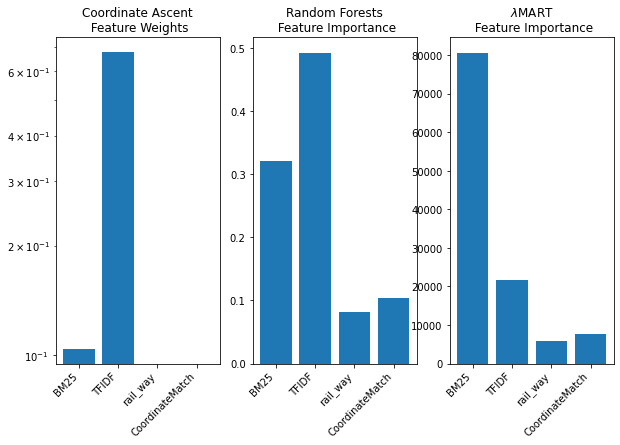

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 6))

ax0.bar(np.arange(len(fnames)), ca_pipe[1].model.to_dict()['Linear']['weights'])
ax0.set_xticks(np.arange(len(fnames)))
ax0.set_xticklabels(fnames, rotation=45, ha='right')
ax0.set_title("Coordinate Ascent\n Feature Weights")
ax0.set_yscale('log')

ax1.bar(np.arange(len(fnames)), rf.feature_importances_)
ax1.set_xticks(np.arange(len(fnames)))
ax1.set_xticklabels(fnames, rotation=45, ha='right')
ax1.set_title("Random Forests\n Feature Importance")

print(lmart_l.feature_importances_)
ax2.bar(np.arange(len(fnames)), lmart_l.feature_importances_)
ax2.set_xticks(np.arange(len(fnames)))
ax2.set_xticklabels(fnames, rotation=45, ha='right')
ax2.set_title("$\lambda$MART\n Feature Importance")

fig.show()

## Search Result Sorting(used for search recommendation)

In [ ]:
search_result_df=ca_pipe.search("cannabinoid molecules drug").head(55)

In [ ]:
s1=pd.read_csv("/content/drive/MyDrive/SI650/FinalProject/finance_df_1000_2000.csv",index_col=0).loc[:1999]
s2=pd.read_csv("/content/drive/MyDrive/SI650/FinalProject/finance_df_2000_4000.csv",index_col=0).loc[:1999]
s3=pd.read_csv("/content/drive/MyDrive/SI650/FinalProject/finance_df_4000_6000.csv",index_col=0).loc[:1999]
s4=pd.read_csv("/content/drive/MyDrive/SI650/FinalProject/finance_df_6000_8000.csv",index_col=0).loc[:1999]
s5=pd.read_csv("/content/drive/MyDrive/SI650/FinalProject/finance_df_8000_plus.csv",index_col=None)
finance_df=pd.concat([s1,s2,s3,s4,s5],axis=0,ignore_index=True)
finance_df

,ticker,eps,dividend,tcl,tse,stable,total_cash,total_current_asset
0,KMB,-3.208556,NaN,"[7197000000, 7209000000, 7257000000, 6749000000]","[437000000, 593000000, 705000000, 514000000]","[16.469107551487415, 12.156829679595278, 10.29...","[539000000, 442000000, 303000000, 270000000]","[5041000000, 5057000000, 5174000000, 5565000000]"
1,SPNS,1.203422,0.0346,"[143251000, 148787000, nan, 151695000]","[377158000, 382657000, nan, 406548000]","[0.379816946743805, 0.38882602435078933, nan, ...","[64628000, 66295000, 152561000, 190243000]","[130011000, 147223000, 267358000, 300345000]"
2,GBCI,1.333333,0.0364,"[23481955000, 23341529000, 22658658000, 223621...","[2772357000, 2896239000, 2934193000, 3177622000]","[8.470032899803309, 8.059255123627574, 7.72227...","[203790000, 330961000, 633142000, 437686000]","[nan, nan, nan, nan]"
3,SBT,1.292181,0.0230,"[1985571000, 2033833000, 2231235000, 2299616000]","[329601000, 335332000, nan, 343627000]","[6.024165582021899, 6.06513246573545, nan, 6.6...","[53626000, 78844000, 1005518000, 412859000]","[nan, nan, nan, nan]"
4,PUM.F,0.916667,NaN,"[3066900000, 2680300000, 2238100000, 2164500000]","[2897300000, 2585000000, 2430400000, 2213300000]","[1.058537258827184, 1.0368665377176016, 0.9208...","[463700000, 518100000, 655900000, 757500000]","[2192800000, 2481200000, 2613000000, 3489800000]"
...,...,...,...,...,...,...,...,...
10480,BEPC,0.087855,0.0415,\n2021-12-31 8.975000e+09\n2020-12-31 9....,\n2021-12-31 3.667000e+09\n2020-12-31 1....,\n2021-12-31 2.447505\n2020-12-31 8.3593...,\n2021-12-31 410000000.0\n2020-12-31 355...,\n2021-12-31 2.308000e+09\n2020-12-31 1....
10481,VYNE,0.446735,NaN,\n2021-12-31 18410000.0\n2020-12-31 2176...,\n2021-12-31 48636000.0\n2020-12-31 3749...,\n2021-12-31 0.378526\n2020-12-31 0.5805...,\n2021-12-31 42250000.0\n2020-12-31 5756...,\n2021-12-31 63186000.0\n2020-12-31 87...
10482,CAH,1.324123,0.0265,\n2022-06-30 3.055000e+10\n2021-06-30 2....,\n2022-06-30 -7.090000e+08\n2021-06-30 1....,\n2022-06-30 -43.088858\n2021-06-30 15.42...,\n2022-06-30 4.717000e+09\n2021-06-30 3....,\n2022-06-30 3.293500e+10\n2021-06-30 3....
10483,RMV.L,1.551587,0.0159,\n2021-12-31 27628000.0\n2020-12-31 2318...,\n2021-12-31 70532000.0\n2020-12-31 123...,\n2021-12-31 0.391709\n2020-12-31 0.1882...,\n2021-12-31 42985000.0\n2020-12-31 9669...,\n2021-12-31 72277000.0\n2020-12-31 121...


In [ ]:
finance_df["tse"][1]

[[377158000.0, 382657000.0, 406548000.0], [0, 1, 3]]

In [ ]:
def str_to_float(row):
  l=[]
  x=[]
  if type(row)==float:
    return row
  elif row[0]=="[":
    row=row[1:-1]
    row=row.replace(" ","")
    splitted_row=row.split(",")
    for a in range(len(splitted_row)):
      if splitted_row[a]!="nan":
        l.append(float(splitted_row[a]))
        x.append(a)
    
  elif row !=nan and type(row)==str:
    cur_text=row.split("\n")[1:][:-1]
    for i in range(len(cur_text)):
      num=cur_text[i].split(" ")
      if num[-1]=="nan":
        continue
      else:
        l.append(float(num[-1]))
        x.append(i)
  row =[l,x]
  return row
def fit_finance_df(row):
  #print(row)
  if type(row)==float:
    return 0
  elif len(row[0])==0:
    return 0
  elif len(row[0])<=1:
    return 1
  elif np.polyfit(row[1],row[0],1)[0]>=0:
    return -1 #since first number represents the latest year
  else:
    return 1
# def fit_debt_df(row):
#   #print(row)
#   if type(row)==float:
#     return nan
#   elif len(row[0])==0:
#     return nan
#   elif len(row[0])<=1:
#     return True
#   elif np.polyfit(row[1],row[0],1)[0]>=0:
#     return True #since first number represents the latest year, higher the worse
#   else:
#     return False

In [ ]:
finance_df["tse"]=finance_df["tse"].apply(str_to_float)
finance_df["tcl"]=finance_df["tcl"].apply(str_to_float)
finance_df["stable"]=finance_df["stable"].apply(str_to_float)
finance_df["total_cash"]=finance_df["total_cash"].apply(str_to_float)
finance_df["total_current_asset"]=finance_df["total_current_asset"].apply(str_to_float)
finance_df

,ticker,eps,dividend,tcl,tse,stable,total_cash,total_current_asset
0,KMB,-3.208556,NaN,"[[7197000000.0, 7209000000.0, 7257000000.0, 67...","[[437000000.0, 593000000.0, 705000000.0, 51400...","[[16.469107551487415, 12.156829679595278, 10.2...","[[539000000.0, 442000000.0, 303000000.0, 27000...","[[5041000000.0, 5057000000.0, 5174000000.0, 55..."
1,SPNS,1.203422,0.0346,"[[143251000.0, 148787000.0, 151695000.0], [0, ...","[[377158000.0, 382657000.0, 406548000.0], [0, ...","[[0.379816946743805, 0.38882602435078933, 0.37...","[[64628000.0, 66295000.0, 152561000.0, 1902430...","[[130011000.0, 147223000.0, 267358000.0, 30034..."
2,GBCI,1.333333,0.0364,"[[23481955000.0, 23341529000.0, 22658658000.0,...","[[2772357000.0, 2896239000.0, 2934193000.0, 31...","[[8.470032899803309, 8.059255123627574, 7.7222...","[[203790000.0, 330961000.0, 633142000.0, 43768...","[[], []]"
3,SBT,1.292181,0.0230,"[[1985571000.0, 2033833000.0, 2231235000.0, 22...","[[329601000.0, 335332000.0, 343627000.0], [0, ...","[[6.024165582021899, 6.06513246573545, 6.69218...","[[53626000.0, 78844000.0, 1005518000.0, 412859...","[[], []]"
4,PUM.F,0.916667,NaN,"[[3066900000.0, 2680300000.0, 2238100000.0, 21...","[[2897300000.0, 2585000000.0, 2430400000.0, 22...","[[1.058537258827184, 1.0368665377176016, 0.920...","[[463700000.0, 518100000.0, 655900000.0, 75750...","[[2192800000.0, 2481200000.0, 2613000000.0, 34..."
...,...,...,...,...,...,...,...,...
10480,BEPC,0.087855,0.0415,"[[8975000000.0, 9839000000.0, 1424000000.0, 81...","[[3667000000.0, 1177000000.0, 7348000000.0, 76...","[[2.447505, 8.359388, 0.193794, 0.105428], [0,...","[[410000000.0, 355000000.0, 304000000.0, 94000...","[[2308000000.0, 1584000000.0, 1363000000.0, 88..."
10481,VYNE,0.446735,NaN,"[[18410000.0, 21765000.0, 29326000.0, 10468000...","[[48636000.0, 37493000.0, 17575000.0, 92182000...","[[0.378526, 0.580508, 1.66862, 0.113558], [0, ...","[[42250000.0, 57563000.0, 43759000.0, 27868000...","[[63186000.0, 87259000.0, 76414000.0, 10116700..."
10482,CAH,1.324123,0.0265,"[[30550000000.0, 27624000000.0, 23615000000.0,...","[[-709000000.0, 1791000000.0, 1789000000.0, 63...","[[-43.088858, 15.423786, 13.200112, 3.809893],...","[[4717000000.0, 3407000000.0, 2771000000.0, 25...","[[32935000000.0, 31048000000.0, 25940000000.0,..."
10483,RMV.L,1.551587,0.0159,"[[27628000.0, 23184000.0, 42522000.0, 38864000...","[[70532000.0, 123145000.0, 41340000.0, 1258400...","[[0.391709, 0.188266, 1.028592, 3.088366], [0,...","[[42985000.0, 96690000.0, 32117000.0, 15847000...","[[72277000.0, 121637000.0, 60672000.0, 4284300..."


In [ ]:
finance_df["tse_coeff"]=finance_df["tse"].apply(fit_finance_df)
finance_df["tcl_coeff"]=finance_df["tcl"].apply(fit_finance_df)
finance_df["stable_coeff"]=finance_df["stable"].apply(fit_finance_df)
finance_df["total_cash_coeff"]=finance_df["total_cash"].apply(fit_finance_df)
finance_df["total_current_asset_coeff"]=finance_df["total_current_asset"].apply(fit_finance_df)
finance_df

,ticker,eps,dividend,tcl,tse,stable,total_cash,total_current_asset,tse_coeff,tcl_coeff,stable_coeff,total_cash_coeff,total_current_asset_coeff
0,KMB,-3.208556,NaN,"[[7197000000.0, 7209000000.0, 7257000000.0, 67...","[[437000000.0, 593000000.0, 705000000.0, 51400...","[[16.469107551487415, 12.156829679595278, 10.2...","[[539000000.0, 442000000.0, 303000000.0, 27000...","[[5041000000.0, 5057000000.0, 5174000000.0, 55...",-1,1,1,1,-1
1,SPNS,1.203422,0.0346,"[[143251000.0, 148787000.0, 151695000.0], [0, ...","[[377158000.0, 382657000.0, 406548000.0], [0, ...","[[0.379816946743805, 0.38882602435078933, 0.37...","[[64628000.0, 66295000.0, 152561000.0, 1902430...","[[130011000.0, 147223000.0, 267358000.0, 30034...",-1,-1,1,-1,-1
2,GBCI,1.333333,0.0364,"[[23481955000.0, 23341529000.0, 22658658000.0,...","[[2772357000.0, 2896239000.0, 2934193000.0, 31...","[[8.470032899803309, 8.059255123627574, 7.7222...","[[203790000.0, 330961000.0, 633142000.0, 43768...","[[], []]",-1,1,1,-1,0
3,SBT,1.292181,0.0230,"[[1985571000.0, 2033833000.0, 2231235000.0, 22...","[[329601000.0, 335332000.0, 343627000.0], [0, ...","[[6.024165582021899, 6.06513246573545, 6.69218...","[[53626000.0, 78844000.0, 1005518000.0, 412859...","[[], []]",-1,-1,-1,-1,0
4,PUM.F,0.916667,NaN,"[[3066900000.0, 2680300000.0, 2238100000.0, 21...","[[2897300000.0, 2585000000.0, 2430400000.0, 22...","[[1.058537258827184, 1.0368665377176016, 0.920...","[[463700000.0, 518100000.0, 655900000.0, 75750...","[[2192800000.0, 2481200000.0, 2613000000.0, 34...",1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,BEPC,0.087855,0.0415,"[[8975000000.0, 9839000000.0, 1424000000.0, 81...","[[3667000000.0, 1177000000.0, 7348000000.0, 76...","[[2.447505, 8.359388, 0.193794, 0.105428], [0,...","[[410000000.0, 355000000.0, 304000000.0, 94000...","[[2308000000.0, 1584000000.0, 1363000000.0, 88...",-1,1,1,1,1
10481,VYNE,0.446735,NaN,"[[18410000.0, 21765000.0, 29326000.0, 10468000...","[[48636000.0, 37493000.0, 17575000.0, 92182000...","[[0.378526, 0.580508, 1.66862, 0.113558], [0, ...","[[42250000.0, 57563000.0, 43759000.0, 27868000...","[[63186000.0, 87259000.0, 76414000.0, 10116700...",-1,1,-1,1,-1
10482,CAH,1.324123,0.0265,"[[30550000000.0, 27624000000.0, 23615000000.0,...","[[-709000000.0, 1791000000.0, 1789000000.0, 63...","[[-43.088858, 15.423786, 13.200112, 3.809893],...","[[4717000000.0, 3407000000.0, 2771000000.0, 25...","[[32935000000.0, 31048000000.0, 25940000000.0,...",-1,1,-1,1,1
10483,RMV.L,1.551587,0.0159,"[[27628000.0, 23184000.0, 42522000.0, 38864000...","[[70532000.0, 123145000.0, 41340000.0, 1258400...","[[0.391709, 0.188266, 1.028592, 3.088366], [0,...","[[42985000.0, 96690000.0, 32117000.0, 15847000...","[[72277000.0, 121637000.0, 60672000.0, 4284300...",1,-1,-1,1,1


In [ ]:
finance_df_clean=finance_df.fillna(0) 
finance_df_clean

,ticker,eps,dividend,tcl,tse,stable,total_cash,total_current_asset,tse_coeff,tcl_coeff,stable_coeff,total_cash_coeff,total_current_asset_coeff
0,KMB,-3.208556,0.0000,"[[7197000000.0, 7209000000.0, 7257000000.0, 67...","[[437000000.0, 593000000.0, 705000000.0, 51400...","[[16.469107551487415, 12.156829679595278, 10.2...","[[539000000.0, 442000000.0, 303000000.0, 27000...","[[5041000000.0, 5057000000.0, 5174000000.0, 55...",-1,1,1,1,-1
1,SPNS,1.203422,0.0346,"[[143251000.0, 148787000.0, 151695000.0], [0, ...","[[377158000.0, 382657000.0, 406548000.0], [0, ...","[[0.379816946743805, 0.38882602435078933, 0.37...","[[64628000.0, 66295000.0, 152561000.0, 1902430...","[[130011000.0, 147223000.0, 267358000.0, 30034...",-1,-1,1,-1,-1
2,GBCI,1.333333,0.0364,"[[23481955000.0, 23341529000.0, 22658658000.0,...","[[2772357000.0, 2896239000.0, 2934193000.0, 31...","[[8.470032899803309, 8.059255123627574, 7.7222...","[[203790000.0, 330961000.0, 633142000.0, 43768...","[[], []]",-1,1,1,-1,0
3,SBT,1.292181,0.0230,"[[1985571000.0, 2033833000.0, 2231235000.0, 22...","[[329601000.0, 335332000.0, 343627000.0], [0, ...","[[6.024165582021899, 6.06513246573545, 6.69218...","[[53626000.0, 78844000.0, 1005518000.0, 412859...","[[], []]",-1,-1,-1,-1,0
4,PUM.F,0.916667,0.0000,"[[3066900000.0, 2680300000.0, 2238100000.0, 21...","[[2897300000.0, 2585000000.0, 2430400000.0, 22...","[[1.058537258827184, 1.0368665377176016, 0.920...","[[463700000.0, 518100000.0, 655900000.0, 75750...","[[2192800000.0, 2481200000.0, 2613000000.0, 34...",1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,BEPC,0.087855,0.0415,"[[8975000000.0, 9839000000.0, 1424000000.0, 81...","[[3667000000.0, 1177000000.0, 7348000000.0, 76...","[[2.447505, 8.359388, 0.193794, 0.105428], [0,...","[[410000000.0, 355000000.0, 304000000.0, 94000...","[[2308000000.0, 1584000000.0, 1363000000.0, 88...",-1,1,1,1,1
10481,VYNE,0.446735,0.0000,"[[18410000.0, 21765000.0, 29326000.0, 10468000...","[[48636000.0, 37493000.0, 17575000.0, 92182000...","[[0.378526, 0.580508, 1.66862, 0.113558], [0, ...","[[42250000.0, 57563000.0, 43759000.0, 27868000...","[[63186000.0, 87259000.0, 76414000.0, 10116700...",-1,1,-1,1,-1
10482,CAH,1.324123,0.0265,"[[30550000000.0, 27624000000.0, 23615000000.0,...","[[-709000000.0, 1791000000.0, 1789000000.0, 63...","[[-43.088858, 15.423786, 13.200112, 3.809893],...","[[4717000000.0, 3407000000.0, 2771000000.0, 25...","[[32935000000.0, 31048000000.0, 25940000000.0,...",-1,1,-1,1,1
10483,RMV.L,1.551587,0.0159,"[[27628000.0, 23184000.0, 42522000.0, 38864000...","[[70532000.0, 123145000.0, 41340000.0, 1258400...","[[0.391709, 0.188266, 1.028592, 3.088366], [0,...","[[42985000.0, 96690000.0, 32117000.0, 15847000...","[[72277000.0, 121637000.0, 60672000.0, 4284300...",1,-1,-1,1,1


In [ ]:
#Calculate final order score
finance_df_clean["score"]=finance_df_clean["eps"]+finance_df_clean["dividend"]-finance_df_clean["tse_coeff"]-finance_df_clean["tcl_coeff"]+2*finance_df_clean["stable_coeff"]+finance_df_clean["total_cash_coeff"]+finance_df_clean["total_current_asset_coeff"]
finance_df_clean


,ticker,eps,dividend,tcl,tse,stable,total_cash,total_current_asset,tse_coeff,tcl_coeff,stable_coeff,total_cash_coeff,total_current_asset_coeff,score
0,KMB,-3.208556,0.0000,"[[7197000000.0, 7209000000.0, 7257000000.0, 67...","[[437000000.0, 593000000.0, 705000000.0, 51400...","[[16.469107551487415, 12.156829679595278, 10.2...","[[539000000.0, 442000000.0, 303000000.0, 27000...","[[5041000000.0, 5057000000.0, 5174000000.0, 55...",-1,1,1,1,-1,-1.208556
1,SPNS,1.203422,0.0346,"[[143251000.0, 148787000.0, 151695000.0], [0, ...","[[377158000.0, 382657000.0, 406548000.0], [0, ...","[[0.379816946743805, 0.38882602435078933, 0.37...","[[64628000.0, 66295000.0, 152561000.0, 1902430...","[[130011000.0, 147223000.0, 267358000.0, 30034...",-1,-1,1,-1,-1,3.238022
2,GBCI,1.333333,0.0364,"[[23481955000.0, 23341529000.0, 22658658000.0,...","[[2772357000.0, 2896239000.0, 2934193000.0, 31...","[[8.470032899803309, 8.059255123627574, 7.7222...","[[203790000.0, 330961000.0, 633142000.0, 43768...","[[], []]",-1,1,1,-1,0,2.369733
3,SBT,1.292181,0.0230,"[[1985571000.0, 2033833000.0, 2231235000.0, 22...","[[329601000.0, 335332000.0, 343627000.0], [0, ...","[[6.024165582021899, 6.06513246573545, 6.69218...","[[53626000.0, 78844000.0, 1005518000.0, 412859...","[[], []]",-1,-1,-1,-1,0,0.315181
4,PUM.F,0.916667,0.0000,"[[3066900000.0, 2680300000.0, 2238100000.0, 21...","[[2897300000.0, 2585000000.0, 2430400000.0, 22...","[[1.058537258827184, 1.0368665377176016, 0.920...","[[463700000.0, 518100000.0, 655900000.0, 75750...","[[2192800000.0, 2481200000.0, 2613000000.0, 34...",1,1,1,-1,-1,-1.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,BEPC,0.087855,0.0415,"[[8975000000.0, 9839000000.0, 1424000000.0, 81...","[[3667000000.0, 1177000000.0, 7348000000.0, 76...","[[2.447505, 8.359388, 0.193794, 0.105428], [0,...","[[410000000.0, 355000000.0, 304000000.0, 94000...","[[2308000000.0, 1584000000.0, 1363000000.0, 88...",-1,1,1,1,1,4.129355
10481,VYNE,0.446735,0.0000,"[[18410000.0, 21765000.0, 29326000.0, 10468000...","[[48636000.0, 37493000.0, 17575000.0, 92182000...","[[0.378526, 0.580508, 1.66862, 0.113558], [0, ...","[[42250000.0, 57563000.0, 43759000.0, 27868000...","[[63186000.0, 87259000.0, 76414000.0, 10116700...",-1,1,-1,1,-1,-1.553265
10482,CAH,1.324123,0.0265,"[[30550000000.0, 27624000000.0, 23615000000.0,...","[[-709000000.0, 1791000000.0, 1789000000.0, 63...","[[-43.088858, 15.423786, 13.200112, 3.809893],...","[[4717000000.0, 3407000000.0, 2771000000.0, 25...","[[32935000000.0, 31048000000.0, 25940000000.0,...",-1,1,-1,1,1,1.350623
10483,RMV.L,1.551587,0.0159,"[[27628000.0, 23184000.0, 42522000.0, 38864000...","[[70532000.0, 123145000.0, 41340000.0, 1258400...","[[0.391709, 0.188266, 1.028592, 3.088366], [0,...","[[42985000.0, 96690000.0, 32117000.0, 15847000...","[[72277000.0, 121637000.0, 60672000.0, 4284300...",1,-1,-1,1,1,1.567487


## Search Engine Evaluation

In [ ]:
ca_search_result=ca_pipe.search("cannabinoid molecules drug").head(20)[["docno","query"]]
ca_search_result=ca_search_result.merge(finance_df_clean,left_on='docno',right_on='ticker')
ca_search_result=ca_search_result.sort_values(by=['score'],ascending=False)
ca_search_result #sprc is in the list, so it has fulfilled the initial requirement

,docno,query,ticker,eps,dividend,tcl,tse,stable,total_cash,total_current_asset,tse_coeff,tcl_coeff,stable_coeff,total_cash_coeff,total_current_asset_coeff,score
11,INM,cannabinoid molecules drug,INM,5.364807,0.0000,"[[3319541.0, 2215361.0, 1676268.0, 1562865.0],...","[[9078541.0, 7376567.0, 5878318.0, 18226000.0]...","[[0.365647, 0.300324, 0.285161, 0.085749], [0,...","[[6176866.0, 7363126.0, 5805809.0, 12873961.0]...","[[9597776.0, 8378269.0, 6312457.0, 18548316.0]...",-1,1,1,-1,-1,5.364807
6,OPNT,cannabinoid molecules drug,OPNT,2.439560,0.0000,"[[7040375.0, 4994668.0, 6787607.0, 6845558.0],...","[[20501989.0, 29596311.0, 39263246.0, 46839808...","[[0.343399608691625, 0.16875981604599302, 0.17...","[[24613638.0, 30980473.0, 48251336.0, 37853947...","[[29370578.0, 39254656.0, 59099153.0, 69158964...",-1,-1,1,-1,-1,4.439560
19,SAVA,cannabinoid molecules drug,SAVA,2.432432,0.0000,"[[12534000.0, 1865000.0, 1387000.0, 511000.0],...","[[253915000.0, 92200000.0, 22099000.0, 1962800...","[[0.049363, 0.020228, 0.062763, 0.026034], [0,...","[[233437000.0, 93506000.0, 23081000.0, 1980700...","[[244482000.0, 93994000.0, 23349000.0, 2004000...",1,1,1,1,1,4.432432
12,NUVB,cannabinoid molecules drug,NUVB,1.361607,0.0000,"[[16925000.0, 6551000.0, 3204000.0, 902000.0],...","[[745997000.0, 215084000.0, -24116000.0, -7440...","[[0.022688, 0.030458, -0.132858, -1.212366], [...","[[132423000.0, 29755000.0, 3469000.0, 138000.0...","[[772073000.0, 220683000.0, 119885000.0, 15800...",1,1,1,1,1,3.361607
13,SCPS,cannabinoid molecules drug,SCPS,1.321534,0.0274,"[[4170266.0, 3805296.0, 854541.0, 137964.0], [...","[[4017449.0, -1831228.0, -82859.0, -5326.0], [...","[[1.038038, -2.078002, -10.313195, -25.903868]...","[[7942971.0, 1832100.0, 36747.0, 1660.0], [0, ...","[[8184875.0, 1971739.0, 768023.0, 132638.0], [...",1,1,1,1,1,3.348934
14,SDGR,cannabinoid molecules drug,SDGR,1.056277,0.0000,"[[91211000.0, 73205000.0, 45020000.0, 27005000...","[[557071000.0, 624015000.0, -93364000.0, -7156...","[[0.163733, 0.117313, -0.482199, -0.377376], [...","[[120267000.0, 202296000.0, 25986000.0, 777160...","[[625060000.0, 682978000.0, 118536000.0, 10469...",1,1,1,1,1,3.056277
10,CRIS,cannabinoid molecules drug,CRIS,0.781528,0.0000,"[[13438000.0, 10079000.0, 6541000.0, 13250000....","[[90707000.0, 130670000.0, -33911000.0, -44960...","[[0.148147, 0.077133, -0.192887, -2.947064], [...","[[40014000.0, 129610000.0, 15430000.0, 2363600...","[[122375000.0, 172752000.0, 25003000.0, 279610...",1,1,1,1,1,2.781528
0,ANEB,cannabinoid molecules drug,ANEB,0.206868,0.0000,"[[512531.0, 241633.0, 223865.0], [0, 1, 2]]","[[15066900.0, 21411858.0, -171137.0], [0, 1, 2]]","[[0.034017, 0.011285, -1.308104], [0, 1, 2]]","[[14548471.0, 19985645.0, 3024980.0], [0, 1, 2]]","[[15579431.0, 21653491.0, 3028480.0], [0, 1, 2]]",1,1,1,1,1,2.206868
18,RAPT,cannabinoid molecules drug,RAPT,1.678832,0.0000,"[[9595000.0, 11742000.0, 9256000.0, 4643000.0]...","[[186380000.0, 104179000.0, 73121000.0, -97113...","[[0.051481, 0.11271, 0.126585, -0.04781], [0, ...","[[24027000.0, 24918000.0, 77383000.0, 63798000...","[[192973000.0, 115598000.0, 80506000.0, 650620...",1,1,1,-1,1,1.678832
3,CLVRW,cannabinoid molecules drug,CLVRW,1.429251,0.0219,0,0,0,0,0,0,0,0,0,0,1.451151


In [ ]:
ca_search_result2=ca_pipe.search("steel seamless pipes").head(20)[["docno","query"]]
ca_search_result2=ca_search_result2.merge(finance_df_clean,left_on='docno',right_on='ticker')
ca_search_result2=ca_search_result2.sort_values(by=['score'],ascending=False)
ca_search_result2#HUDI is in the list, so it has fulfilled the initial requirement

,docno,query,ticker,eps,dividend,tcl,tse,stable,total_cash,total_current_asset,tse_coeff,tcl_coeff,stable_coeff,total_cash_coeff,total_current_asset_coeff,score
1,SZGPY,steel seamless pipes,SZGPY,0.000000,0.0368,"[[3650700000.0, 2082100000.0, 2225300000.0, 23...","[[3346300000.0, 2669800000.0, 2929000000.0, 33...","[[1.090966, 0.779871, 0.759747, 0.719011], [0,...","[[741800000.0, 621400000.0, 700500000.0, 55560...","[[6004700000.0, 3992900000.0, 4518500000.0, 49...",-1,1,1,1,1,4.036800
0,SZGA.F,steel seamless pipes,SZGA.F,0.000000,0.0339,"[[3650700000.0, 2082100000.0, 2225300000.0, 23...","[[3346300000.0, 2669800000.0, 2929000000.0, 33...","[[1.090966, 0.779871, 0.759747, 0.719011], [0,...","[[741800000.0, 621400000.0, 700500000.0, 55560...","[[6004700000.0, 3992900000.0, 4518500000.0, 49...",-1,1,1,1,1,4.033900
19,MRC,steel seamless pipes,MRC,-0.169581,0.0000,"[[436000000.0, 399000000.0, 486000000.0, 56900...","[[323000000.0, 350000000.0, 642000000.0, 69200...","[[1.349845, 1.14, 0.757009, 0.822254], [0, 1, ...","[[48000000.0, 119000000.0, 32000000.0, 4300000...","[[899000000.0, 966000000.0, 1218000000.0, 1465...",-1,-1,1,1,-1,3.830419
2,SZG.F,steel seamless pipes,SZG.F,-0.736842,0.0332,"[[3650700000.0, 2082100000.0, 2225300000.0, 23...","[[3346300000.0, 2669800000.0, 2929000000.0, 33...","[[1.090966, 0.779871, 0.759747, 0.719011], [0,...","[[741800000.0, 621400000.0, 700500000.0, 55560...","[[6004700000.0, 3992900000.0, 4518500000.0, 49...",-1,1,1,1,1,3.296358
3,TS,steel seamless pipes,TS,3.973214,0.0274,"[[1559645000.0, 1166475000.0, 1780457000.0, 17...","[[11960580000.0, 11262890000.0, 11988960000.0,...","[[0.130399, 0.103568, 0.148508, 0.145836], [0,...","[[318127000.0, 584681000.0, 1554299000.0, 4283...","[[4981173000.0, 4287672000.0, 5670607000.0, 54...",-1,-1,-1,-1,-1,2.000614
18,NWPX,steel seamless pipes,NWPX,1.193672,0.0000,"[[64092000.0, 45901000.0, 41566000.0, 31492000...","[[283383000.0, 269626000.0, 248158000.0, 21859...","[[0.226167, 0.17024, 0.167498, 0.144069], [0, ...","[[2997000.0, 37927000.0, 31014000.0, 6677000.0...","[[228226000.0, 191963000.0, 195039000.0, 15951...",1,1,1,-1,1,1.193672
11,FRD,steel seamless pipes,FRD,0.000000,0.0082,"[[60810607.0, 29072271.0, 9645359.0, 12364902....","[[79686648.0, 65339976.0, 66865367.0, 72481577...","[[0.763122, 0.444939, 0.14425, 0.170594], [0, ...","[[2598102.0, 8191001.0, 17057751.0, 11667161.0...","[[125361815.0, 77534635.0, 65211517.0, 7445620...",1,1,1,-1,1,0.008200
12,HUDI,steel seamless pipes,HUDI,0.000000,0.0000,"[[48767449.0, 43334670.0, 47566394.0, 59326325...","[[51213908.0, 25564287.0, 21028503.0, 16485781...","[[0.952231, 1.695125, 2.261996, 3.598636], [0,...","[[15350197.0, 796794.0, 1057992.0, 1308378.0],...","[[77080673.0, 47347153.0, 47932151.0, 57176633...",1,-1,-1,1,1,0.000000
13,AMSYF,steel seamless pipes,AMSYF,0.566728,0.0000,"[[24167000000.0, 22667000000.0, 21287000000.0,...","[[49106000000.0, 38280000000.0, 38521000000.0,...","[[0.492139, 0.592137, 0.552608, 0.557311], [0,...","[[4215000000.0, 5600000000.0, 4867000000.0, 21...","[[34939000000.0, 27973000000.0, 28616000000.0,...",1,1,-1,1,1,-1.433272
16,ARRD.F,steel seamless pipes,ARRD.F,0.000000,0.0141,"[[24167000000.0, 22667000000.0, 21287000000.0,...","[[49106000000.0, 38280000000.0, 38521000000.0,...","[[0.492139, 0.592137, 0.552608, 0.557311], [0,...","[[4215000000.0, 5600000000.0, 4867000000.0, 21...","[[34939000000.0, 27973000000.0, 28616000000.0,...",1,1,-1,1,1,-1.985900


In [ ]:
sport_search_result=ca_pipe.search("digital sports entertainment gaming").head(20)[["docno","query"]]
sport_search_result=sport_search_result.merge(finance_df_clean,left_on='docno',right_on='ticker')
sport_search_result=sport_search_result.sort_values(by=['score'],ascending=False)
sport_search_result #DKNG is in the list, so it has fulfilled the initial requirement

,docno,query,ticker,eps,dividend,tcl,tse,stable,total_cash,total_current_asset,tse_coeff,tcl_coeff,stable_coeff,total_cash_coeff,total_current_asset_coeff,score
1,INSE,digital sports entertainment gaming,INSE,0.738916,0.0000,"[[81500000.0, 94900000.0, 88100000.0, 42443000...","[[-78000000.0, -101700000.0, -59300000.0, -183...","[[-1.044872, -0.933137, -1.485666, -2.308567],...","[[47800000.0, 47100000.0, 29100000.0, 15988000...","[[126400000.0, 109000000.0, 95300000.0, 490660...",-1,1,1,1,1,4.738916
9,FLTR.L,digital sports entertainment gaming,FLTR.L,1.556842,0.0000,"[[2074100000.0, 1981700000.0, 885500000.0, 578...","[[10250900000.0, 10965100000.0, 3984700000.0, ...","[[0.202333, 0.180728, 0.222225, 0.144672], [0,...","[[951700000.0, 603400000.0, 108100000.0, 12370...","[[1961800000.0, 1461100000.0, 361800000.0, 372...",1,1,1,1,1,3.556842
0,DKNG,digital sports entertainment gaming,DKNG,0.607108,0.0000,"[[929425000.0, 554412000.0, 255080000.0, 19594...","[[1678528000.0, 2631345000.0, -49580000.0, -18...","[[0.553714, 0.210695, -5.144816, -1.057837], [...","[[2152892000.0, 1817258000.0, 76533000.0, 1179...","[[2753330000.0, 2194305000.0, 261148000.0, 262...",1,1,1,1,1,2.607108
8,PPB.F,digital sports entertainment gaming,PPB.F,0.000000,0.0000,"[[2074100000.0, 1981700000.0, 885500000.0, 578...","[[10250900000.0, 10965100000.0, 3984700000.0, ...","[[0.202333, 0.180728, 0.222225, 0.144672], [0,...","[[951700000.0, 603400000.0, 108100000.0, 12370...","[[1961800000.0, 1461100000.0, 361800000.0, 372...",1,1,1,1,1,2.000000
18,SCUA,digital sports entertainment gaming,SCUA,0.000000,0.0000,"[[163111.0], [0]]","[[-22386829.0], [0]]","[[-0.007286], [0]]","[[941792.0], [0]]","[[965559.0], [0]]",1,1,1,1,1,2.000000
11,PDYPY,digital sports entertainment gaming,PDYPY,0.000000,0.0000,"[[2074100000.0, 1981700000.0, 885500000.0, 578...","[[10250900000.0, 10965100000.0, 3984700000.0, ...","[[0.202333, 0.180728, 0.222225, 0.144672], [0,...","[[951700000.0, 603400000.0, 108100000.0, 12370...","[[1961800000.0, 1461100000.0, 361800000.0, 372...",1,1,1,1,1,2.000000
10,PPBA.F,digital sports entertainment gaming,PPBA.F,0.000000,0.0000,"[[2074100000.0, 1981700000.0, 885500000.0, 578...","[[10250900000.0, 10965100000.0, 3984700000.0, ...","[[0.202333, 0.180728, 0.222225, 0.144672], [0,...","[[951700000.0, 603400000.0, 108100000.0, 12370...","[[1961800000.0, 1461100000.0, 361800000.0, 372...",1,1,1,1,1,2.000000
2,GIGM,digital sports entertainment gaming,GIGM,0.000000,0.0000,"[[3186474.0, 2923000.0, 3584000.0, 3273000.0],...","[[50583150.0, 54097000.0, 55544000.0, 58172000...","[[0.062995, 0.054033, 0.064525, 0.056264], [0,...","[[41455445.0, 45702000.0, 57743000.0, 59308000...","[[42582517.0, 46525000.0, 58893000.0, 60595000...",-1,-1,1,-1,-1,2.000000
6,HAS.F,digital sports entertainment gaming,HAS.F,2.138211,0.0421,"[[2455900000.0, 2403300000.0, 1257082000.0, 12...","[[3025900000.0, 2896700000.0, 2995530000.0, 17...","[[0.811626, 0.829668, 0.419653, 0.726323], [0,...","[[983400000.0, 1376500000.0, 4580369000.0, 118...","[[3728100000.0, 3846600000.0, 6747521000.0, 30...",1,1,1,-1,-1,0.180311
4,TEKKU,digital sports entertainment gaming,TEKKU,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,0.000000


In [ ]:
finance_df["tse"][1]
finance_df["tse"][1]

[[377158000.0, 382657000.0, 406548000.0], [0, 1, 3]]

In [ ]:
np.polyfit([1,2,3],[406548000.0, 382657000.0,377158000.0 ],1)
#np.average([377158000.0, 382657000.0, nan, 406548000.0])

array([-1.46950000e+07,  4.18177667e+08])

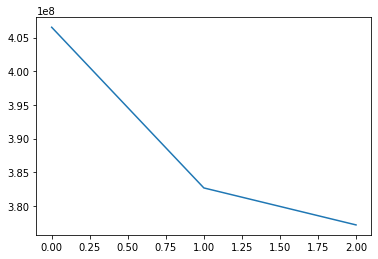

In [ ]:
import matplotlib.pyplot as plt
plt.plot([406548000.0, 382657000.0,377158000.0 ])
plt.show()

In [ ]:
finance_df.to_csv("finance_df.csv")

# Annotation dataset for 20 queries

## **agriculture**

In [ ]:
agriculture_df=bm25.search("agriculture").loc[1:100]
agriculture_df=pd.concat([agriculture_df, tfidf.search("agriculture").loc[1:100]], ignore_index=True, axis=0)
agriculture_df=agriculture_df.groupby(['docno'],as_index=False).min()
agriculture_df=agriculture_df.merge(new_doc,left_on='docno',right_on='docno')
# agriculture_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/agriculture_query.csv")
agriculture_df

,qid,docid,docno,rank,score,query
1,1,8634,CRESY,1,7.620394,agriculture
2,1,2973,PW,2,7.441091,agriculture
3,1,5697,CGA,3,7.362946,agriculture
4,1,8922,GRNA,4,7.332246,agriculture
5,1,7481,AGM,5,7.214584,agriculture
...,...,...,...,...,...,...
96,1,5354,CDZIP,96,5.158488,agriculture
97,1,8677,QOMOU,97,5.158488,agriculture
98,1,5321,PL,98,5.105943,agriculture
99,1,720,CHSCO,99,5.083079,agriculture


In [ ]:
agriculture_df=pd.read_csv("agriculture_query.csv")
agriculture_df["label"]=agriculture_df["label"].astype(int)
agriculture_df["label"].value_counts() 

5    45
2    21
3    18
4    10
1     6
Name: label, dtype: int64

## **Consulting**

In [ ]:
consulting_df=bm25.search("consulting").loc[1:100]
consulting_df=pd.concat([consulting_df, tfidf.search("consulting").loc[1:100]], ignore_index=True, axis=0)
consulting_df=consulting_df.groupby(['docno'],as_index=False).min()
consulting_df=consulting_df.merge(new_doc,left_on='docno',right_on='docno')
consulting_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/consulting_query.csv")
consulting_df

,docno,qid,docid,rank,score,query,text
0,0AA3.L,1,25,90,2.968441,consulting,"Nagarro SE, a digital engineering company, pro..."
1,0DPM.L,1,4048,98,2.960042,consulting,Bechtle AG provides information technology (IT...
2,0HA9.L,1,8671,34,3.376732,consulting,"Indra Sistemas, S.A. operates as a technology ..."
3,0ITL.L,1,3154,17,3.530561,consulting,"Arthur J. Gallagher & Co., together with its s..."
4,0ITV.L,1,4053,50,3.316608,consulting,"Gartner, Inc. operates as a research and advis..."
...,...,...,...,...,...,...,...
95,WFCF,1,3605,82,3.073068,consulting,"Where Food Comes From, Inc., together with its..."
96,WLDN,1,6115,10,3.641144,consulting,"Willdan Group, Inc., together with its subsidi..."
97,WTW,1,8312,39,3.344351,consulting,Willis Towers Watson Public Limited Company op...
98,WTY.F,1,2724,38,3.344351,consulting,Willis Towers Watson Public Limited Company op...


In [ ]:
consulting_df=pd.read_csv("consulting_query.csv")
consulting_df["label"]=consulting_df["label"].astype(int)
consulting_df["label"].value_counts() 

4    54
5    39
3     4
2     3
Name: label, dtype: int64

## **insurance utility**

In [ ]:
insurance_utility_df=bm25.search("insurance utility").loc[:60]
insurance_utility_df=pd.concat([insurance_utility_df, tf.search("insurance utility").loc[:50]], ignore_index=True, axis=0)
insurance_utility_df=insurance_utility_df.groupby(['docno'],as_index=False).min()
insurance_utility_df=insurance_utility_df.merge(new_doc,left_on='docno',right_on='docno')
insurance_utility_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/insurance_utility_query.csv")
insurance_utility_df
# df.loc[4].docno

,docno,qid,docid,rank,score,query,text
0,0AA3.L,1,25,57,6.635327,insurance utility,"Nagarro SE, a digital engineering company, pro..."
1,0DNH.L,1,10253,32,7.248234,insurance utility,Atos SE provides digital transformation soluti...
2,0HEC.L,1,4302,36,7.124909,insurance utility,"American Electric Power Company, Inc., an elec..."
3,0HMZ.L,1,2623,5,15.000000,insurance utility,"W. R. Berkley Corporation, an insurance holdin..."
4,0HYE.L,1,9697,2,19.000000,insurance utility,"Cincinnati Financial Corporation, together wit..."
...,...,...,...,...,...,...,...
101,WIT,1,1541,27,7.257730,insurance utility,Wipro Limited operates as information technolo...
102,WR1.F,1,3476,7,15.000000,insurance utility,"W. R. Berkley Corporation, an insurance holdin..."
103,WRB,1,2859,6,15.000000,insurance utility,"W. R. Berkley Corporation, an insurance holdin..."
104,WTM,1,9310,6,9.000000,insurance utility,"White Mountains Insurance Group, Ltd., through..."


In [ ]:
for i in range(len(insurance_df)):
  if insurance_df.loc[i].docno=='BRK-B':
    print(insurance_df.loc[i])
    break

qid                      1
docid                 8081
docno                BRK-B
rank                    93
score             6.419763
query    insurance utility
Name: 93, dtype: object


In [ ]:
insurance_utility_df=pd.read_csv("insurance_utility_query.csv")
insurance_utility_df["label"]=insurance_utility_df["label"].astype(int)
insurance_utility_df["label"].value_counts() 

4    37
3    29
5    21
1    15
2     4
Name: label, dtype: int64

## **insurance rail transportation**

In [ ]:
rail_insurance_df=bm25.search("insurance rail transportation")[1:100]
rail_insurance_df=pd.concat([rail_insurance_df, tfidf.search("insurance rail transportation").loc[1:100],tf.search("insurance rail transportation").loc[:10]], ignore_index=True, axis=0)
rail_insurance_df=rail_insurance_df.groupby(['docno'],as_index=False).min()
rail_insurance_df=rail_insurance_df.merge(new_doc,left_on='docno',right_on='docno')
rail_insurance_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/rail_insurance_query.csv")
rail_insurance_df
# for i in range(1,len(rail_insurance_df)):
#   if rail_insurance_df.loc[i].docno=='BRK-B':
#     print(rail_insurance_df.loc[i])
#     break

,docno,qid,docid,rank,score,query,text
0,0HCT.L,1,3352,28,6.421636,insurance rail transportation,Alliant Energy Corporation operates as a utili...
1,0HMZ.L,1,2623,4,15.000000,insurance rail transportation,"W. R. Berkley Corporation, an insurance holdin..."
2,0HQW.L,1,3591,37,6.137580,insurance rail transportation,"C.H. Robinson Worldwide, Inc., together with i..."
3,0HRJ.L,1,5582,3,8.815979,insurance rail transportation,"CSX Corporation, together with its subsidiarie..."
4,0HYE.L,1,9697,2,19.000000,insurance rail transportation,"Cincinnati Financial Corporation, together wit..."
...,...,...,...,...,...,...,...
111,WERN,1,4296,11,7.045517,insurance rail transportation,"Werner Enterprises, Inc., a transportation and..."
112,WKRCF,1,785,94,8.438643,insurance rail transportation,Wacker Neuson SE manufactures and distributes ...
113,WR1.F,1,3476,6,15.000000,insurance rail transportation,"W. R. Berkley Corporation, an insurance holdin..."
114,WRB,1,2859,5,15.000000,insurance rail transportation,"W. R. Berkley Corporation, an insurance holdin..."


In [ ]:
rail_insurance_df=pd.read_csv("rail_insurance_query.csv")
rail_insurance_df["label"]=rail_insurance_df["label"].astype(int)
rail_insurance_df["label"].value_counts() 

4    50
1    28
3    19
2    12
5     7
Name: label, dtype: int64

## **digital sports entertainment and gaming company**

In [ ]:
digit_sport_df=bm25.search("digital sports entertainment gaming")[1:100]
digit_sport_df=pd.concat([digit_sport_df, tfidf.search("digital sports entertainment gaming").loc[1:100],tf.search("digital sports entertainment gaming").loc[:50]], ignore_index=True, axis=0)
digit_sport_df=digit_sport_df.groupby(['docno'],as_index=False).min()
digit_sport_df=digit_sport_df.merge(new_doc,left_on='docno',right_on='docno')
digit_sport_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/digit_sport_query.csv")
# for i in range(1,len(digit_sport_df)):
#   if digit_sport_df.loc[i].docno=='DKNG':
#     print(digit_sport_df.loc[i])
#     break
digit_sport_df

,docno,qid,docid,rank,score,query,text
0,0A0Y.L,1,3238,35,10.000000,digital sports entertainment gaming,"Fox Corporation operates as a news, sports, an..."
1,0A78.L,1,1167,27,11.084308,digital sports entertainment gaming,"Caesars Entertainment, Inc. operates as a gami..."
2,0IFX.L,1,8987,47,9.973037,digital sports entertainment gaming,"Electronic Arts Inc. develops, markets, publis..."
3,0J3K.L,1,7061,7,13.162239,digital sports entertainment gaming,"Hasbro, Inc., together with its subsidiaries, ..."
4,0JWC.L,1,7880,34,10.478676,digital sports entertainment gaming,"MGM Resorts International, through its subsidi..."
...,...,...,...,...,...,...,...
110,VICI,1,8894,77,8.829524,digital sports entertainment gaming,VICI Properties is an experiential real estate...
111,VS,1,228,96,8.196184,digital sports entertainment gaming,Versus Systems Inc. develops and operates a bu...
112,WBD,1,1354,57,9.591633,digital sports entertainment gaming,"Warner Bros. Discovery, Inc., a media company,..."
113,WISA,1,6720,58,9.500726,digital sports entertainment gaming,"WiSA Technologies, Inc. develops, manufactures..."


In [ ]:
digit_sport_df=pd.read_csv("digit_sport_query.csv")
digit_sport_df["label"]=digit_sport_df["label"].astype(int)
digit_sport_df["label"].value_counts() 

5    36
2    31
3    22
4    21
1     5
Name: label, dtype: int64

In [ ]:
for i in range(1,len(breast_prostate_cancer_df)):
  if breast_prostate_cancer_df.loc[i].docno=='VERU':
    print(breast_prostate_cancer_df.loc[i])
    break

docno                      VERU
qid                           1
docid                       416
rank                          1
score                      14.0
query    breast prostate cancer
Name: 113, dtype: object


## **breast and prostate cancers**

In [ ]:
breast_prostate_cancer_df=bm25.search("breast prostate cancer")[1:100]
breast_prostate_cancer_df=pd.concat([breast_prostate_cancer_df, tfidf.search("breast prostate cancer").loc[1:100],tf.search("breast prostate cancer").loc[:50]], ignore_index=True, axis=0)
breast_prostate_cancer_df=breast_prostate_cancer_df.groupby(['docno'],as_index=False).min()
breast_prostate_cancer_df=breast_prostate_cancer_df.merge(new_doc,left_on='docno',right_on='docno')
breast_prostate_cancer_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/breast_prostate_cancer_query.csv")
# for i in range(1,len(breast_prostate_cancer_df)):
#   if breast_prostate_cancer_df.loc[i].docno=='VERU':
#     print(breast_prostate_cancer_df.loc[i])
#     break
breast_prostate_cancer_df

,docno,qid,docid,rank,score,query,text
0,0A8R.L,1,8195,22,8.000000,breast prostate cancer,"Seagen Inc., a biotechnology company, develops..."
1,0M2N.L,1,4075,30,9.408888,breast prostate cancer,"Orion Oyj develops, manufactures, and markets ..."
2,0NZY.L,1,1395,65,7.825035,breast prostate cancer,Eckert & Ziegler Strahlen- und Medizintechnik ...
3,0Q1G.L,1,8766,7,10.951709,breast prostate cancer,"Eli Lilly and Company discovers, develops, and..."
4,ABVC,1,1370,79,7.334956,breast prostate cancer,"ABVC BioPharma, Inc., a clinical stage biophar..."
...,...,...,...,...,...,...,...
112,VCYT,1,3799,9,11.000000,breast prostate cancer,"Veracyte, Inc. operates as a diagnostics compa..."
113,VERU,1,416,1,14.000000,breast prostate cancer,"Veru Inc., an oncology biopharmaceutical compa..."
114,XNCR,1,4269,85,7.127019,breast prostate cancer,"Xencor, Inc., a clinical stage biopharmaceutic..."
115,ZLAB,1,6500,40,6.000000,breast prostate cancer,Zai Lab Limited develops and commercializes th...


In [ ]:
breast_prostate_cancer_df=pd.read_csv("breast_prostate_cancer_query.csv")
breast_prostate_cancer_df["label"]=breast_prostate_cancer_df["label"].astype(int)
breast_prostate_cancer_df["label"].value_counts() 

4    55
5    35
3    15
2    12
Name: label, dtype: int64

## **generic drugs**

In [ ]:
generic_drugs_df=bm25.search("generic drugs, oncology")[1:100]
generic_drugs_df=pd.concat([generic_drugs_df, tfidf.search("generic drugs, oncology").loc[1:100],tf.search("generic drugs, oncology").loc[:20]], ignore_index=True, axis=0)
generic_drugs_df=generic_drugs_df.groupby(['docno'],as_index=False).min()
generic_drugs_df=generic_drugs_df.merge(new_doc,left_on='docno',right_on='docno')
generic_drugs_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/generic_drugs_query.csv")
# for i in range(1,len(generic_drugs_df)):
#   if generic_drugs_df.loc[i].docno=='VTRS':
#     print(generic_drugs_df.loc[i])
#     break
generic_drugs_df

,docno,qid,docid,rank,score,query,text
0,0H6G.L,1,7287,17,6.000000,"generic drugs, oncology",The AES Corporation operates as a diversified ...
1,0HF3.L,1,5027,66,3.630915,"generic drugs, oncology",AmerisourceBergen Corporation sources and dist...
2,0ID1.L,1,9265,20,6.000000,"generic drugs, oncology","Duke Energy Corporation, together with its sub..."
3,0J1R.L,1,10150,19,4.555248,"generic drugs, oncology","HCA Healthcare, Inc., through its subsidiaries..."
4,0JZU.L,1,4799,41,4.134518,"generic drugs, oncology",McKesson Corporation provides healthcare servi...
...,...,...,...,...,...,...,...
116,URI,1,7115,16,6.000000,"generic drugs, oncology","United Rentals, Inc., through its subsidiaries..."
117,VIA.F,1,1801,37,4.151598,"generic drugs, oncology",Viatris Inc. operates as a healthcare company ...
118,VIRX,1,6528,62,3.656655,"generic drugs, oncology","Viracta Therapeutics, Inc., a precision oncolo..."
119,VREX,1,9662,60,3.695215,"generic drugs, oncology",Varex Imaging Corporation designs and manufact...


In [ ]:
generic_drugs_df=pd.read_csv("generic_drugs_query.csv")
generic_drugs_df["label"]=generic_drugs_df["label"].astype(int)
generic_drugs_df["label"].value_counts() 

4    67
5    24
1    16
3    13
2     1
Name: label, dtype: int64

## **e-commerce fresh ingredients wine**

In [ ]:
ecommerce_ingradient_df=bm25.search("e-commerce, fresh ingredients, wine")[1:115]
ecommerce_ingradient_df=pd.concat([ecommerce_ingradient_df, tfidf.search("e-commerce, fresh ingredients, wine").loc[1:120],tf.search("e-commerce, fresh ingredients, wine").loc[:40]], ignore_index=True, axis=0)
ecommerce_ingradient_df=ecommerce_ingradient_df.groupby(['docno'],as_index=False).min()
ecommerce_ingradient_df=ecommerce_ingradient_df.merge(new_doc,left_on='docno',right_on='docno')
ecommerce_ingradient_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/ecommerce_ingradient_query.csv")
# for i in range(1,len(ecommerce_ingradient_df)):
#   if ecommerce_ingradient_df.loc[i].docno=='APRN':
#     print(ecommerce_ingradient_df.loc[i])
#     break
ecommerce_ingradient_df

,docno,qid,docid,rank,score,query,text
0,013A.F,1,581,102,3.295102,"e-commerce, fresh ingredients, wine","JD.com, Inc. provides supply chain-based techn..."
1,013C.F,1,6383,104,3.295102,"e-commerce, fresh ingredients, wine","JD.com, Inc. provides supply chain-based techn..."
2,0HAT.L,1,8738,107,3.262429,"e-commerce, fresh ingredients, wine",Pernod Ricard SA produces and sells wines and ...
3,0HQ3.L,1,8751,35,2.000000,"e-commerce, fresh ingredients, wine","Brown-Forman Corporation, together with its su..."
4,0HQW.L,1,3591,9,4.000000,"e-commerce, fresh ingredients, wine","C.H. Robinson Worldwide, Inc., together with i..."
...,...,...,...,...,...,...,...
116,WVVI,1,161,0,7.671325,"e-commerce, fresh ingredients, wine","Willamette Valley Vineyards, Inc. produces and..."
117,WVVIP,1,6693,1,7.671325,"e-commerce, fresh ingredients, wine","Willamette Valley Vineyards, Inc. produces and..."
118,YETI,1,10438,77,3.886231,"e-commerce, fresh ingredients, wine","YETI Holdings, Inc. designs, markets, retails,..."
119,YJ,1,2362,55,4.574073,"e-commerce, fresh ingredients, wine",Yunji Inc. operates a social e-commerce platfo...


In [ ]:
ecommerce_ingradient_df=pd.read_csv("ecommerce_ingradient_query.csv")
ecommerce_ingradient_df["label"]=ecommerce_ingradient_df["label"].astype(int)
ecommerce_ingradient_df["label"].value_counts() 

4    66
5    20
1    16
3    12
2     7
Name: label, dtype: int64

## **membership warehouses Wholesale, delivery**

In [ ]:
wholesale_df=bm25.search("membership warehouses Wholesale, delivery")[1:115]
wholesale_df=pd.concat([wholesale_df, tfidf.search("membership warehouses Wholesale, delivery").loc[1:120],tf.search("membership warehouses Wholesale, delivery").loc[:20]], ignore_index=True, axis=0)
wholesale_df=wholesale_df.groupby(['docno'],as_index=False).min()
wholesale_df=wholesale_df.merge(new_doc,left_on='docno',right_on='docno')
wholesale_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/wholesale_query.csv")
# for i in range(1,len(wholesale_df)):
#   if wholesale_df.loc[i].docno=='COST':
#     print(wholesale_df.loc[i])
#     break
wholesale_df

,docno,qid,docid,rank,score,query,text
0,0HBQ.L,1,6930,98,3.695915,"membership warehouses Wholesale, delivery","Akamai Technologies, Inc. provides cloud servi..."
1,0I47.L,1,4413,1,5.000000,"membership warehouses Wholesale, delivery","Costco Wholesale Corporation, together with it..."
2,0JS2.L,1,241,60,4.191849,"membership warehouses Wholesale, delivery",The Kroger Co. operates as a retailer in the U...
3,0QSH.L,1,6903,20,5.813265,"membership warehouses Wholesale, delivery",Fnac Darty SA engages in the retail of enterta...
4,0QZ5.L,1,2056,108,3.540575,"membership warehouses Wholesale, delivery","Cognizant Technology Solutions Corporation, a ..."
...,...,...,...,...,...,...,...
120,YGMZ,1,7789,8,7.254153,"membership warehouses Wholesale, delivery","MingZhu Logistics Holdings Limited, through it..."
121,YQ,1,1413,36,4.749624,"membership warehouses Wholesale, delivery","17 Education & Technology Group Inc., an educa..."
122,ZEST,1,3460,104,3.647767,"membership warehouses Wholesale, delivery","Ecoark Holdings, Inc., through its subsidiarie..."
123,ZTO,1,6710,76,4.022277,"membership warehouses Wholesale, delivery",ZTO Express (Cayman) Inc. provides express del...


In [ ]:
wholesale_df=pd.read_csv("wholesale_query.csv")
wholesale_df["label"]=wholesale_df["label"].astype(int)
wholesale_df["label"].value_counts() 

4    41
1    39
3    29
5     9
2     7
Name: label, dtype: int64

## **software application portfolios united States**

In [ ]:
software_profolio_df=bm25.search("software application portfolios united States")[1:115]
software_profolio_df=pd.concat([software_profolio_df, tfidf.search("software application portfolios united States").loc[1:120],tf.search("software application portfolios united States").loc[:20]], ignore_index=True, axis=0)
software_profolio_df=software_profolio_df.groupby(['docno'],as_index=False).min()
software_profolio_df=software_profolio_df.merge(new_doc,left_on='docno',right_on='docno')
software_profolio_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/software_profolio_df_query.csv")
# for i in range(1,len(software_profolio_df)):
#   if software_profolio_df.loc[i].docno=='PHUN':
#     print(software_profolio_df.loc[i])
#     break
software_profolio_df

,docno,qid,docid,rank,score,query,text
0,0EDE.L,1,10452,80,6.217372,software application portfolios united States,NXP Semiconductors N.V. offers various semicon...
1,0HBQ.L,1,6930,85,6.173386,software application portfolios united States,"Akamai Technologies, Inc. provides cloud servi..."
2,0HZD.L,1,3554,116,5.837376,software application portfolios united States,Wendel is a private equity firm specializing i...
3,0IL6.L,1,4855,91,8.440250,software application portfolios united States,"F5, Inc. provides multi-cloud application secu..."
4,0K3H.L,1,10212,5,8.583206,software application portfolios united States,"Motorola Solutions, Inc. provides mission crit..."
...,...,...,...,...,...,...,...
152,WNDLF,1,3836,117,5.837376,software application portfolios united States,Wendel is a private equity firm specializing i...
153,WSTG,1,9990,57,6.471837,software application portfolios united States,"Wayside Technology Group, Inc. operates as a v..."
154,Z,1,7991,12,7.372980,software application portfolios united States,"Zillow Group, Inc., a digital real estate comp..."
155,ZEN,1,8018,59,6.442380,software application portfolios united States,"Zendesk, Inc., a software development company,..."


In [ ]:
software_profolio_df=pd.read_csv("software_profolio_df_query.csv")
software_profolio_df["label"]=software_profolio_df["label"].astype(int)
software_profolio_df["label"].value_counts() 

5    85
4    31
1    19
2    16
3     6
Name: label, dtype: int64

## **biopharmaceutical for  ophthalmic diseases**

In [ ]:
biopharmaceutical_df=bm25.search("biopharmaceutical, ophthalmic diseases")[1:100]
biopharmaceutical_df=pd.concat([biopharmaceutical_df, tfidf.search("biopharmaceutical, ophthalmic diseases").loc[1:120],tf.search("biopharmaceutical, ophthalmic diseases").loc[:10]], ignore_index=True, axis=0)
biopharmaceutical_df=biopharmaceutical_df.groupby(['docno'],as_index=False).min()
biopharmaceutical_df=biopharmaceutical_df.merge(new_doc,left_on='docno',right_on='docno')
biopharmaceutical_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/biopharmaceutical_query.csv")
# for i in range(1,len(biopharmaceutical_df)):
#   if biopharmaceutical_df.loc[i].docno=='OYST':
#     print(biopharmaceutical_df.loc[i])
#     break
biopharmaceutical_df

,docno,qid,docid,rank,score,query,text
0,0NZT.L,1,7018,80,3.588715,"biopharmaceutical, ophthalmic diseases","UCB SA, a biopharmaceutical company, develops ..."
1,0QCV.L,1,3973,30,5.314011,"biopharmaceutical, ophthalmic diseases","AbbVie Inc. discovers, develops, manufactures,..."
2,4AB.F,1,776,28,5.314011,"biopharmaceutical, ophthalmic diseases","AbbVie Inc. discovers, develops, manufactures,..."
3,ABBV,1,1212,29,5.314011,"biopharmaceutical, ophthalmic diseases","AbbVie Inc. discovers, develops, manufactures,..."
4,ACRS,1,9684,102,3.516391,"biopharmaceutical, ophthalmic diseases","Aclaris Therapeutics, Inc. operates a clinical..."
...,...,...,...,...,...,...,...
117,VCNX,1,7145,56,3.683939,"biopharmaceutical, ophthalmic diseases","Vaccinex, Inc., a clinical-stage biotechnology..."
118,VIGL,1,4218,54,3.705124,"biopharmaceutical, ophthalmic diseases","Vigil Neuroscience, Inc., a microglia-focused ..."
119,VTYX,1,5568,1,3.993050,"biopharmaceutical, ophthalmic diseases","Ventyx Biosciences, Inc., a clinical-stage bio..."
120,VYNT,1,6917,100,3.522300,"biopharmaceutical, ophthalmic diseases","Vyant Bio, Inc., a biotechnology company, disc..."


In [ ]:
biopharmaceutical_df=pd.read_csv("biopharmaceutical_query.csv")
biopharmaceutical_df["label"]=biopharmaceutical_df["label"].astype(int)
biopharmaceutical_df["label"].value_counts() 

2    54
5    45
3    21
1     2
Name: label, dtype: int64

## **smart electric vehicles**

In [ ]:
smart_car_df=bm25.search("smart electric vehicles")[1:100]
smart_car_df=pd.concat([smart_car_df, tfidf.search("smart electric vehicles").loc[1:110],tf.search("smart electric vehicles").loc[:10]], ignore_index=True, axis=0)
smart_car_df=smart_car_df.groupby(['docno'],as_index=False).min()
smart_car_df=smart_car_df.merge(new_doc,left_on='docno',right_on='docno')
smart_car_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/smart_car_query.csv")
# for i in range(1,len(smart_car_df)):
#   if smart_car_df.loc[i].docno=='XPEV':
#     print(smart_car_df.loc[i])
#     break
smart_car_df

,docno,qid,docid,rank,score,query,text
0,0AAF.L,1,838,25,7.099139,smart electric vehicles,Vitesco Technologies Group Aktiengesellschaft ...
1,0HOU.L,1,1461,11,8.310216,smart electric vehicles,BorgWarner Inc. provides solutions for combust...
2,0HTQ.L,1,5937,95,6.079998,smart electric vehicles,"CarMax, Inc., together with its subsidiaries, ..."
3,0R0E.L,1,7016,16,7.683462,smart electric vehicles,"General Motors Company designs, builds, and se..."
4,0YCP.L,1,8264,45,6.778241,smart electric vehicles,"Aptiv PLC designs, manufacturers, and sells ve..."
...,...,...,...,...,...,...,...
113,XA4.F,1,2974,93,6.079998,smart electric vehicles,"CarMax, Inc., together with its subsidiaries, ..."
114,XL,1,8208,23,7.169091,smart electric vehicles,XL Fleet Corp. provides fleet electrification ...
115,XOS,1,4449,19,7.301930,smart electric vehicles,"Xos, Inc., a mobility solutions company, manuf..."
116,XPEV,1,9559,4,9.169780,smart electric vehicles,"XPeng Inc. designs, develops, manufactures, an..."


In [ ]:
smart_car_df=pd.read_csv("smart_car_query.csv")
smart_car_df["label"]=smart_car_df["label"].astype(int)
smart_car_df["label"].value_counts() 

3    57
2    24
5    16
4    11
1    10
Name: label, dtype: int64

## **steel seamless pipes**

In [ ]:
steel_pipe_df=bm25.search("steel seamless pipes")[1:100]
steel_pipe_df=pd.concat([steel_pipe_df, tfidf.search("steel seamless pipes").loc[1:110],tf.search("steel seamless pipes").loc[:10]], ignore_index=True, axis=0)
steel_pipe_df=steel_pipe_df.groupby(['docno'],as_index=False).min()
steel_pipe_df=steel_pipe_df.merge(new_doc,left_on='docno',right_on='docno')
steel_pipe_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/steel_pipe_query.csv")
# for i in range(1,len(steel_pipe_df)):
#   if steel_pipe_df.loc[i].docno=='HUDI':
#     print(steel_pipe_df.loc[i])
#     break
steel_pipe_df

,docno,qid,docid,rank,score,query,text
0,0FJ8.L,1,5552,79,5.289040,steel seamless pipes,Outokumpu Oyj produces and sells various stain...
1,0K9L.L,1,9011,2,6.188211,steel seamless pipes,Nucor Corporation manufactures and sells steel...
2,0OLF.L,1,4089,52,5.704527,steel seamless pipes,"Aperam S.A., together with its subsidiaries, e..."
3,0QQ2.L,1,3862,95,4.947270,steel seamless pipes,"Geberit AG develops, produces, and distributes..."
4,7AA.F,1,9146,53,5.704527,steel seamless pipes,"Aperam S.A., together with its subsidiaries, e..."
...,...,...,...,...,...,...,...
106,WOR,1,1594,63,5.501547,steel seamless pipes,"Worthington Industries, Inc., an industrial ma..."
107,X,1,6266,9,12.697889,steel seamless pipes,United States Steel Corporation produces and s...
108,ZEUS,1,3736,22,8.786654,steel seamless pipes,"Olympic Steel, Inc. processes, distributes, an..."
109,ZKIN,1,8641,7,11.859967,steel seamless pipes,"ZK International Group Co., Ltd., through its ..."


In [ ]:
steel_pipe_df=pd.read_csv("steel_pipe_query.csv")
steel_pipe_df["label"]=steel_pipe_df["label"].astype(int)
steel_pipe_df["label"].value_counts() 

3    48
4    47
1     8
5     4
2     4
Name: label, dtype: int64

## cannabinoid molecules

In [ ]:
cannabinoid_df=bm25.search("cannabinoid molecules drug")[1:110]
cannabinoid_df=pd.concat([cannabinoid_df, tfidf.search("cannabinoid molecules drug").loc[1:110],tf.search("cannabinoid molecules drug").loc[:20]], ignore_index=True, axis=0)
cannabinoid_df=cannabinoid_df.groupby(['docno'],as_index=False).min()
cannabinoid_df=cannabinoid_df.merge(new_doc,left_on='docno',right_on='docno')
cannabinoid_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/cannabinoid_query.csv")
# for i in range(1,len(cannabinoid_df)):
#   if cannabinoid_df.loc[i].docno=='SPRC':
#     print(cannabinoid_df.loc[i])
#     break
cannabinoid_df

,docno,qid,docid,rank,score,query,text
0,0A8R.L,1,8195,73,5.080904,cannabinoid molecules drug,"Seagen Inc., a biotechnology company, develops..."
1,0M2N.L,1,4075,16,5.000000,cannabinoid molecules drug,"Orion Oyj develops, manufactures, and markets ..."
2,0QK8.L,1,1447,53,5.707126,cannabinoid molecules drug,"Baxter International Inc., through its subsidi..."
3,0QNO.L,1,3569,12,5.000000,cannabinoid molecules drug,Lonza Group Ltd supplies products and services...
4,ABSI,1,1351,8,4.785214,cannabinoid molecules drug,"Absci Corporation, a drug and target discovery..."
...,...,...,...,...,...,...,...
110,WST,1,2817,3,4.179057,cannabinoid molecules drug,"West Pharmaceutical Services, Inc. designs, ma..."
111,WVE,1,9478,40,6.365277,cannabinoid molecules drug,"Wave Life Sciences Ltd., a clinical stage gene..."
112,XXII,1,5647,60,5.498122,cannabinoid molecules drug,"22nd Century Group, Inc., an agricultural biot..."
113,YCBD,1,6606,68,5.170772,cannabinoid molecules drug,"cbdMD, Inc. produces and distributes various c..."


In [ ]:
cannabinoid_df=pd.read_csv("cannabinoid_query.csv")
cannabinoid_df["label"]=cannabinoid_df["label"].astype(int)
cannabinoid_df["label"].value_counts() 

3    61
4    26
2    12
5    12
1     4
Name: label, dtype: int64

## **real estate brokerage**

In [ ]:
real_state_df=bm25.search("real estate brokerage")[1:110]
real_state_df=pd.concat([real_state_df, tfidf.search("real estate brokerage").loc[1:110],tf.search("real estate brokerage").loc[:20]], ignore_index=True, axis=0)
real_state_df=real_state_df.groupby(['docno'],as_index=False).min()
real_state_df=real_state_df.merge(new_doc,left_on='docno',right_on='docno')
real_state_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/real_state_query.csv")
# for i in range(1,len(real_state_df)):
#   if real_state_df.loc[i].docno=='RDFN':
#     print(real_state_df.loc[i])
#     break
real_state_df

,docno,qid,docid,rank,score,query,text
0,0HLQ.L,1,9801,74,6.335732,real estate brokerage,The Bank of New York Mellon Corporation provid...
1,0JW2.L,1,8478,42,7.082593,real estate brokerage,M&T Bank Corporation operates as a bank holdin...
2,0L3I.L,1,10116,57,6.577058,real estate brokerage,"The Charles Schwab Corporation, together with ..."
3,0R9K.L,1,7501,19,12.000000,real estate brokerage,Deutsche Pfandbriefbank AG provides commercial...
4,81R.F,1,3735,103,10.484029,real estate brokerage,"First Republic Bank, together with its subsidi..."
...,...,...,...,...,...,...,...
118,WAFDP,1,4039,26,7.817547,real estate brokerage,"Washington Federal, Inc. operates as the bank ..."
119,WD,1,9944,21,7.934238,real estate brokerage,"Walker & Dunlop, Inc., through its subsidiarie..."
120,WSBC,1,3585,17,8.107685,real estate brokerage,"WesBanco, Inc. operates as the bank holding co..."
121,WSBCP,1,3760,18,8.107685,real estate brokerage,"WesBanco, Inc. operates as the bank holding co..."


In [ ]:
real_state_df=pd.read_csv("real_state_query.csv")
real_state_df["label"]=real_state_df["label"].astype(int)
real_state_df["label"].value_counts() 

4    61
5    36
3    16
2     7
1     3
Name: label, dtype: int64

## **3D vision for autonomous systems**

In [ ]:
ThreeD_vision_df=bm25.search("real time 3D vision for autonomous systems")[1:110]
ThreeD_vision_df=pd.concat([ThreeD_vision_df, tfidf.search("real time 3D vision for autonomous systems").loc[1:110],tf.search("real time 3D vision for autonomous systems").loc[:20]], ignore_index=True, axis=0)
ThreeD_vision_df=ThreeD_vision_df.groupby(['docno'],as_index=False).min()
ThreeD_vision_df=ThreeD_vision_df.merge(new_doc,left_on='docno',right_on='docno')
ThreeD_vision_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/ThreeD_vision_query.csv")
# for i in range(1,len(ThreeD_vision_df)):
#   if ThreeD_vision_df.loc[i].docno=='VLDR':
#     print(ThreeD_vision_df.loc[i])
#     break
ThreeD_vision_df

,docno,qid,docid,rank,score,query,text
0,0A0D.L,1,6192,6,11.029610,real time 3D vision for autonomous systems,"Alcon Inc., an eye care company, researches, d..."
1,0A4M.L,1,2566,41,7.637838,real time 3D vision for autonomous systems,"DexCom, Inc., a medical device company, focuse..."
2,0DUI.L,1,2994,36,7.254592,real time 3D vision for autonomous systems,Basler Aktiengesellschaft engages in the devel...
3,0HJF.L,1,1879,75,6.127586,real time 3D vision for autonomous systems,"Autodesk, Inc. provides 3D design, engineering..."
4,0II2.L,1,550,67,6.836517,real time 3D vision for autonomous systems,"KONE Oyj, together with its subsidiaries, enga..."
...,...,...,...,...,...,...,...
129,VMAR,1,3405,86,6.310165,real time 3D vision for autonomous systems,"Vision Marine Technologies Inc. designs, devel..."
130,VRAR,1,6713,62,6.736974,real time 3D vision for autonomous systems,"The Glimpse Group, Inc., a virtual reality (VR..."
131,VRNT,1,10214,82,6.435368,real time 3D vision for autonomous systems,Verint Systems Inc. provides customer engageme...
132,VSACW,1,9864,101,10.212051,real time 3D vision for autonomous systems,Vision Sensing Acquisition Corp.


In [ ]:
ThreeD_vision_df=pd.read_csv("ThreeD_vision_query.csv")
ThreeD_vision_df["label"]=ThreeD_vision_df["label"].astype(int)
ThreeD_vision_df["label"].value_counts() 

3    35
4    29
1    27
5    24
2    19
Name: label, dtype: int64

## **software platforms counterterrorism apollo**

In [ ]:
counterterrorism_df=bm25.search("software platforms counterterrorism apollo")[1:110]
counterterrorism_df=pd.concat([counterterrorism_df, tfidf.search("software platforms counterterrorism apollo").loc[1:110],tf.search("software platforms counterterrorism apollo").loc[:20]], ignore_index=True, axis=0)
counterterrorism_df=counterterrorism_df.groupby(['docno'],as_index=False).min()
counterterrorism_df=counterterrorism_df.merge(new_doc,left_on='docno',right_on='docno')
counterterrorism_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/counterterrorism_query.csv")
# for i in range(1,len(counterterrorism_df)):
#   if counterterrorism_df.loc[i].docno=='PLTR':
#     print(counterterrorism_df.loc[i])
#     break
counterterrorism_df

,docno,qid,docid,rank,score,query,text
0,0A7N.L,1,4743,99,4.632960,software platforms counterterrorism apollo,"Keysight Technologies, Inc. provides electroni..."
1,0J51.L,1,8552,10,5.948273,software platforms counterterrorism apollo,Hewlett Packard Enterprise Company provides so...
2,0KXM.L,1,10155,5,12.000000,software platforms counterterrorism apollo,"Roper Technologies, Inc. designs and develops ..."
3,1KT.F,1,10011,101,4.632960,software platforms counterterrorism apollo,"Keysight Technologies, Inc. provides electroni..."
4,2HP.F,1,3654,9,5.948273,software platforms counterterrorism apollo,Hewlett Packard Enterprise Company provides so...
...,...,...,...,...,...,...,...
114,VS,1,228,75,4.783748,software platforms counterterrorism apollo,Versus Systems Inc. develops and operates a bu...
115,VTEX,1,8741,98,4.654973,software platforms counterterrorism apollo,VTEX provides software-as-a-service digital co...
116,WEJO,1,9655,23,5.306532,software platforms counterterrorism apollo,Wejo Group Limited provides software and techn...
117,WKME,1,4030,72,4.841213,software platforms counterterrorism apollo,WalkMe Ltd. provides cloud-based digital adopt...


In [ ]:
counterterrorism_df=pd.read_csv("counterterrorism_query.csv")
counterterrorism_df["label"]=counterterrorism_df["label"].astype(int)
counterterrorism_df["label"].value_counts() 

1    80
2    24
3     7
5     4
4     4
Name: label, dtype: int64

## **social media connect and share with friends and family**

In [ ]:
social_media_df=bm25.search("social media connect and share with friends and family")[1:110]
social_media_df=pd.concat([social_media_df, tfidf.search("social media connect and share with friends and family").loc[1:110],tf.search("social media connect and share with friends and family").loc[:20]], ignore_index=True, axis=0)
social_media_df=social_media_df.groupby(['docno'],as_index=False).min()
social_media_df=social_media_df.merge(new_doc,left_on='docno',right_on='docno')
social_media_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/social_media.csv")
# for i in range(1,len(social_media_df)):
#   if social_media_df.loc[i].docno=='META':
#     print(social_media_df.loc[i])
#     break
social_media_df

,docno,qid,docid,rank,score,query,text
0,0A5S.L,1,846,56,6.731403,social media connect and share with friends an...,"HENSOLDT AG, together with its subsidiaries, p..."
1,0IIW.L,1,1023,89,6.532837,social media connect and share with friends an...,"Etsy, Inc. operates two-sided online marketpla..."
2,0IR9.L,1,6120,14,8.000000,social media connect and share with friends an...,"Fortinet, Inc. provides broad, integrated, and..."
3,0NIQ.L,1,2760,19,7.000000,social media connect and share with friends an...,Sartorius Aktiengesellschaft provides bioproce...
4,3E2.F,1,1931,90,6.532837,social media connect and share with friends an...,"Etsy, Inc. operates two-sided online marketpla..."
...,...,...,...,...,...,...,...
117,YOTA,1,4074,9,9.098132,social media connect and share with friends an...,Yotta Acquisition Corporation focuses on enter...
118,YOTAR,1,5907,10,9.098132,social media connect and share with friends an...,Yotta Acquisition Corporation focuses on enter...
119,YOTAU,1,9083,11,9.098132,social media connect and share with friends an...,Yotta Acquisition Corporation focuses on enter...
120,YVR,1,5407,79,6.552787,social media connect and share with friends an...,Liquid Media Group Ltd. provides business solu...


In [ ]:
social_media_df=pd.read_csv("social_media.csv")
social_media_df["label"]=social_media_df["label"].astype(int)
social_media_df["label"].value_counts() 

3    66
4    23
1    15
5    10
2     8
Name: label, dtype: int64

## distributes energy, energy service

In [ ]:
energy_df=bm25.search("distributes energy, energy service")[1:110]
energy_df=pd.concat([energy_df, tfidf.search("distributes energy, energy service").loc[1:110],tf.search("distributes energy, energy service").loc[:20]], ignore_index=True, axis=0)
energy_df=energy_df.groupby(['docno'],as_index=False).min()
energy_df=energy_df.merge(new_doc,left_on='docno',right_on='docno')
energy_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/energy_query.csv")
# for i in range(1,len(energy_df)):
#   if energy_df.loc[i].docno=='D':
#     print(energy_df.loc[i])
#     break
energy_df

,docno,qid,docid,rank,score,query,text
0,0A9Y.L,1,5653,85,5.583982,"distributes energy, energy service","Vantage Towers AG, a tower infrastructure comp..."
1,0HCT.L,1,3352,65,5.859838,"distributes energy, energy service",Alliant Energy Corporation operates as a utili...
2,0HIT.L,1,10058,80,7.453765,"distributes energy, energy service","Iberdrola, S.A. engages in the generation, tra..."
3,0HR4.L,1,8800,28,8.411892,"distributes energy, energy service",CMS Energy Corporation operates as an energy c...
4,0I35.L,1,81,61,5.862876,"distributes energy, energy service","Consolidated Edison, Inc., through its subsidi..."
...,...,...,...,...,...,...,...
147,WEC,1,9433,2,7.203440,"distributes energy, energy service","WEC Energy Group, Inc., through its subsidiari..."
148,WIC.F,1,254,3,9.449233,"distributes energy, energy service","WEC Energy Group, Inc., through its subsidiari..."
149,XEL,1,9607,83,7.441844,"distributes energy, energy service","Xcel Energy Inc., through its subsidiaries, ge..."
150,ZT,1,5670,62,7.592615,"distributes energy, energy service",Zimmer Energy Transition Acquisition Corp. doe...


In [ ]:
energy_df=pd.read_csv("energy_query.csv")
energy_df["label"]=energy_df["label"].astype(int)
energy_df["label"].value_counts() 

5    97
3    22
1    15
4    13
2     5
Name: label, dtype: int64

## B2B Asia to US,parcel merchandise

In [ ]:
parcel_df=bm25.search("B2B Asia to US,parcel merchandise")[1:110]
parcel_df=pd.concat([parcel_df, tfidf.search("B2B Asia to US,parcel merchandise").loc[1:110],tf.search("B2B Asia to US,parcel merchandise").loc[:20]], ignore_index=True, axis=0)
parcel_df=parcel_df.groupby(['docno'],as_index=False).min()
parcel_df=parcel_df.merge(new_doc,left_on='docno',right_on='docno')
parcel_df.to_csv("/content/drive/MyDrive/SI650/FinalProject/parcel_query.csv")
# for i in range(1,len(parcel_df)):
#   if parcel_df.loc[i].docno=='GCT':
#     print(parcel_df.loc[i])
#     break
parcel_df

,docno,qid,docid,rank,score,query,text
0,0A9O.L,1,9812,8,5.427658,"B2B Asia to US,parcel merchandise","ABOUT YOU Holding AG, a fashion and technology..."
1,0BNS.L,1,6574,11,5.197902,"B2B Asia to US,parcel merchandise",Kesko Oyj engages in the grocery trading busin...
2,0IC8.L,1,8583,2,5.142072,"B2B Asia to US,parcel merchandise","Dollar Tree, Inc. operates discount variety re..."
3,0JS2.L,1,241,80,3.649539,"B2B Asia to US,parcel merchandise",The Kroger Co. operates as a retailer in the U...
4,0KUT.L,1,2373,97,3.473817,"B2B Asia to US,parcel merchandise",Regency Centers is the preeminent national own...
...,...,...,...,...,...,...,...
112,XPEL,1,1121,41,4.599426,"B2B Asia to US,parcel merchandise","XPEL, Inc. manufactures, sells, distributes, a..."
113,YDX.F,1,6343,103,3.428420,"B2B Asia to US,parcel merchandise","Yandex N.V., a technology company, builds inte..."
114,YNDX,1,3335,102,3.428420,"B2B Asia to US,parcel merchandise","Yandex N.V., a technology company, builds inte..."
115,YNDX.ME,1,2027,101,3.428420,"B2B Asia to US,parcel merchandise","Yandex N.V., a technology company, builds inte..."


In [ ]:
parcel_df=pd.read_csv("parcel_query.csv")
parcel_df["label"]=parcel_df["label"].astype(int)
parcel_df["label"].value_counts() 

3    41
1    37
4    24
2    14
5     1
Name: label, dtype: int64